In [1]:
import netCDF4 as nc4
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from mpl_toolkits.mplot3d import axes3d
import copy
import pandas as pd
import time
# import xarray as xr
import mpl_toolkits as mpl
import plotly.graph_objects as go
import plotly.express as px
from scipy import interpolate


### Collect PPE results

In [2]:
# Open the file and obtain the last value
# This step will take much longer than expected.
start = time.time()

gpp_collect = []
gpp_bl_collect = []
gpp_nl_collect = []
npp_collect = []
npp_bl_collect = []
npp_nl_collect = []
vegc_collect = []
vegc_bl_collect = []
vegc_nl_collect = []
leafc_collect = []
leafc_bl_collect = []
leafc_nl_collect = []
soilc_collect = []
block_ens = [255, 145, 400, 400, 400]
# Path to all ensemble members
# block_path = ['/pscratch/sd/s/sshu3/FATES_MRV/fates_test_2024-02-12_e9515ed7a8_5d40c9e6/run/test_needleleaf_dead/', \
#               '/pscratch/sd/s/sshu3/FATES_MRV/fates_test256_2024-02-12_e9515ed7a8_5d40c9e6/run/test_needleleaf_dead/', \
#               '/pscratch/sd/s/sshu3/FATES_MRV/fates_test401_2024-02-12_e9515ed7a8_5d40c9e6/run/test_needleleaf_dead/', \
#               '/pscratch/sd/s/sshu3/FATES_MRV/fates_test801_2024-02-12_e9515ed7a8_5d40c9e6/run/test_needleleaf_dead/', \
#               '/pscratch/sd/s/sshu3/FATES_MRV/fates_test1201_2024-02-13_e9515ed7a8_5d40c9e6/run/test_needleleaf_dead/']
# block_path = ['/pscratch/sd/s/sshu3/FATES_MRV/fates_test_2024-02-12_e9515ed7a8_5d40c9e6/run/hist_2pft_highsla/', \
#               '/pscratch/sd/s/sshu3/FATES_MRV/fates_test256_2024-02-12_e9515ed7a8_5d40c9e6/run/hist_2pft_highsla/', \
#               '/pscratch/sd/s/sshu3/FATES_MRV/fates_test401_2024-02-12_e9515ed7a8_5d40c9e6/run/hist_2pft_highsla/', \
#               '/pscratch/sd/s/sshu3/FATES_MRV/fates_test801_2024-02-12_e9515ed7a8_5d40c9e6/run/hist_2pft_highsla/', \
#               '/pscratch/sd/s/sshu3/FATES_MRV/fates_test1201_2024-02-13_e9515ed7a8_5d40c9e6/run/hist_2pft_highsla/']
block_path = ['/pscratch/sd/s/sshu3/FATES_MRV/fates_test_2024-02-12_e9515ed7a8_5d40c9e6/run/', \
              '/pscratch/sd/s/sshu3/FATES_MRV/fates_test256_2024-02-12_e9515ed7a8_5d40c9e6/run/', \
              '/pscratch/sd/s/sshu3/FATES_MRV/fates_test401_2024-02-12_e9515ed7a8_5d40c9e6/run/', \
              '/pscratch/sd/s/sshu3/FATES_MRV/fates_test801_2024-02-12_e9515ed7a8_5d40c9e6/run/', \
              '/pscratch/sd/s/sshu3/FATES_MRV/fates_test1201_2024-02-13_e9515ed7a8_5d40c9e6/run/']
block_prefix = ['fates_test_2024-02-12_e9515ed7a8_5d40c9e6.elm_',\
               'fates_test256_2024-02-12_e9515ed7a8_5d40c9e6.elm_', \
               'fates_test401_2024-02-12_e9515ed7a8_5d40c9e6.elm_', \
               'fates_test801_2024-02-12_e9515ed7a8_5d40c9e6.elm_', \
               'fates_test1201_2024-02-13_e9515ed7a8_5d40c9e6.elm_']

# Loop through blocks
for k in np.arange(0,5):
    for i in np.arange(0,block_ens[k]):
        ens_num = str(i+1).zfill(4)
        fpath = block_path[k] + block_prefix[k]+ens_num+'.h0.1990-02-01-00000.nc'
        # Some issue causes the last 400 ensemble member not finishing the job
        if(k == 4):
            fpath = block_path[k] + block_prefix[k]+ens_num+'.h0.1990-02-01-00000.nc'
        dtc = nc4.Dataset(fpath)
        dgpp = dtc['FATES_GPP'][:]
        dgpp_pf = dtc['FATES_GPP_PF'][:]
        dnpp = dtc['FATES_NPP'][:]
        dnpp_pf = dtc['FATES_NPP_PF'][:]
        dvegc = dtc['FATES_VEGC'][:]
        dvegc_pf = dtc['FATES_VEGC_PF'][:]
        dleafc = dtc['FATES_LEAFC'][:]
        dleafc_pf = dtc['FATES_LEAFC_PF'][:]
        dsoilc = dtc['TOTSOMC_1m'][:]
        dtc.close()
    
        # Obtain the mean results
        gpp_collect.append(np.nanmean(dgpp[:,0])*3600*24*365)
        gpp_bl_collect.append(np.nanmean(dgpp_pf[:,0,0])*3600*24*365)
        gpp_nl_collect.append(np.nanmean(dgpp_pf[:,1,0])*3600*24*365)
        npp_collect.append(np.nanmean(dnpp[:,0])*3600*24*365)
        npp_bl_collect.append(np.nanmean(dnpp_pf[:,0,0])*3600*24*365)
        npp_nl_collect.append(np.nanmean(dnpp_pf[:,1,0])*3600*24*365)
        vegc_collect.append(np.nanmean(dvegc[:,0]))
        vegc_bl_collect.append(np.nanmean(dvegc_pf[:,0,0]))
        vegc_nl_collect.append(np.nanmean(dvegc_pf[:,1,0]))
        leafc_collect.append(np.nanmean(dleafc[:,0]))
        leafc_bl_collect.append(np.nanmean(dleafc_pf[:,0,0]))
        leafc_nl_collect.append(np.nanmean(dleafc_pf[:,1,0]))
        soilc_collect.append(np.nanmean(dsoilc[:,0])*1e-3)

end = time.time()
print('Time elapsed: ', end - start)
    

Time elapsed:  28.276463747024536


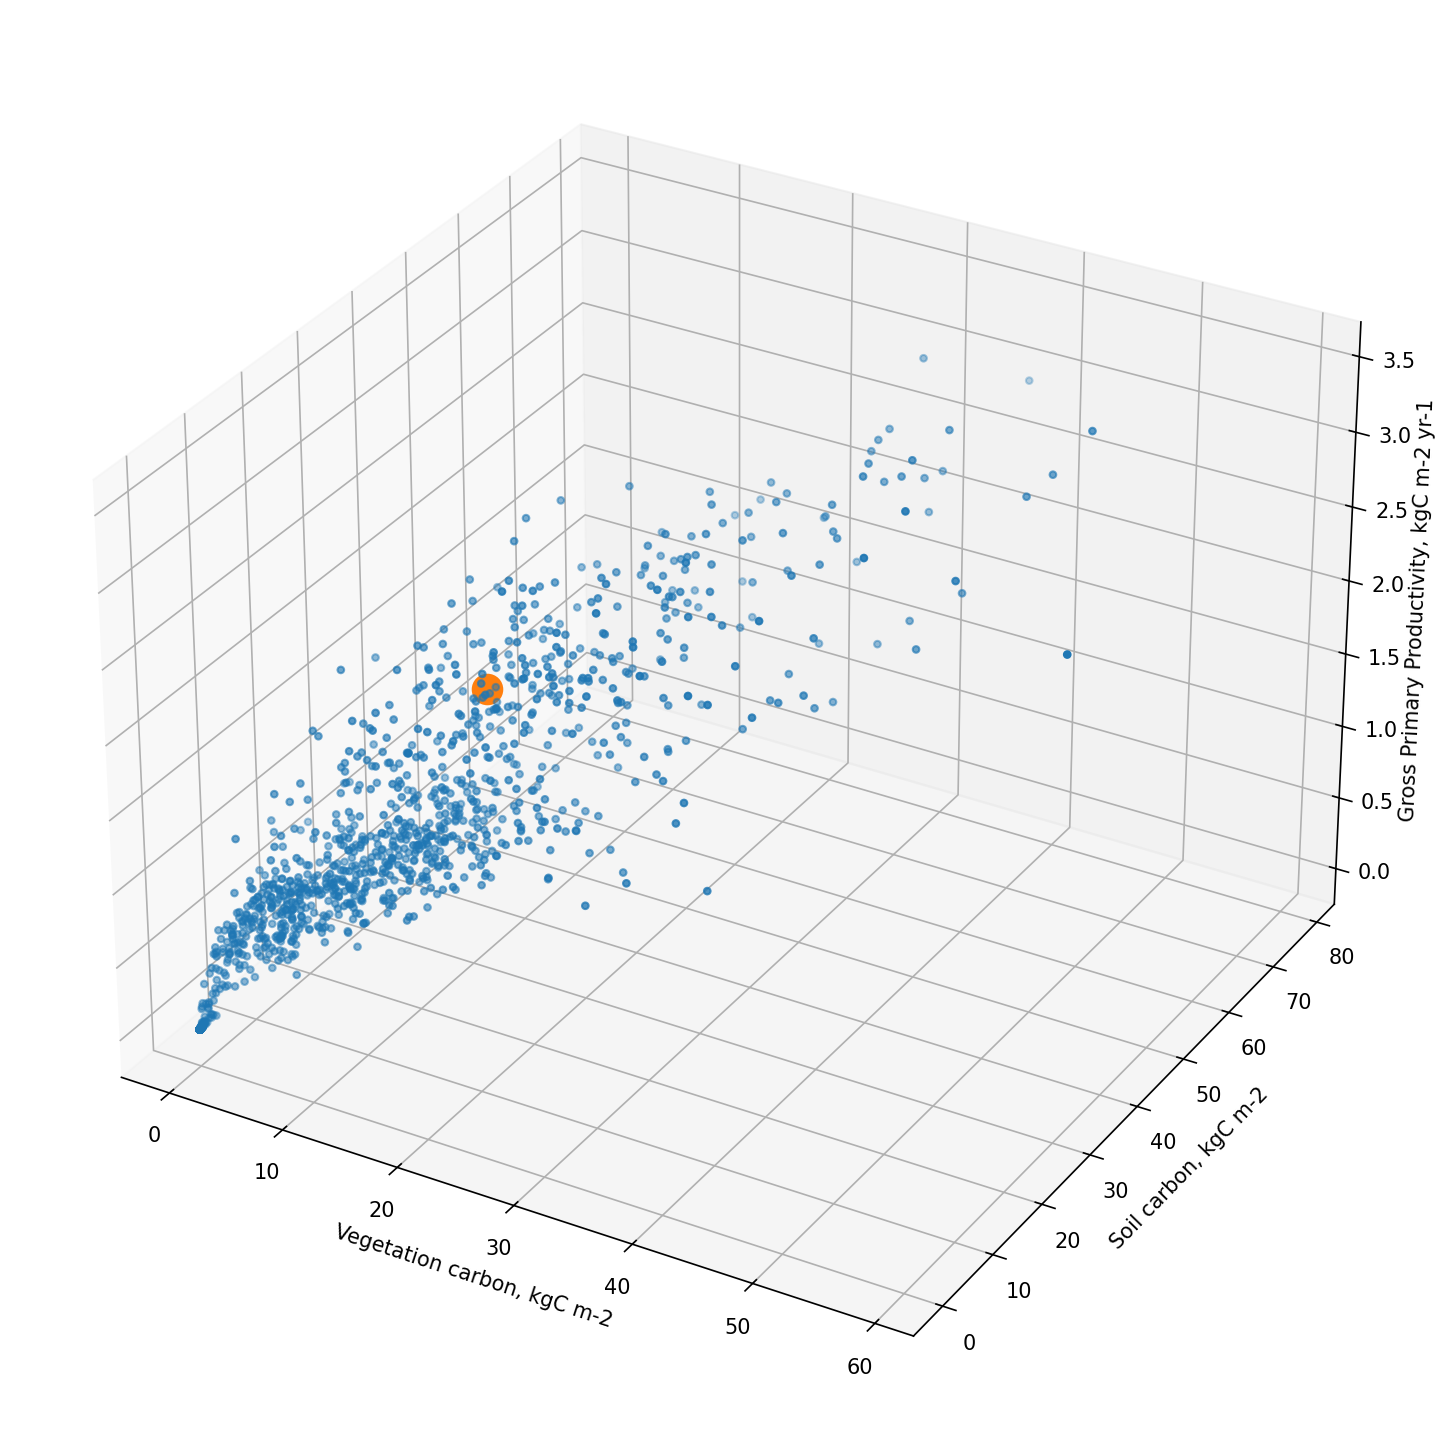

In [3]:
vegc_obs = 9.2*(1/0.6)
vegc_nl_obs = 4.22*(1/0.6)
vegc_bl_obs = 4.97*(1/0.6)
soilc_obs = 22.26
gpp_obs = 2.0

# Static 3D scatter plot

fig = plt.figure(figsize=(5,5), dpi=150)
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
ax.scatter(vegc_collect, soilc_collect, gpp_collect, s=10)
ax.scatter(vegc_obs, soilc_obs, gpp_obs, s=200)

# ax.set_xlim(0, 20)
ax.set_xlabel('Vegetation carbon, kgC m-2')
ax.set_ylabel('Soil carbon, kgC m-2')
ax.set_zlabel('Gross Primary Productivity, kgC m-2 yr-1')
ax.zaxis.labelpad=-0.3
fig.tight_layout()

fig.set_figwidth(10)
fig.set_figheight(10)
plt.savefig('3d_ens.png')


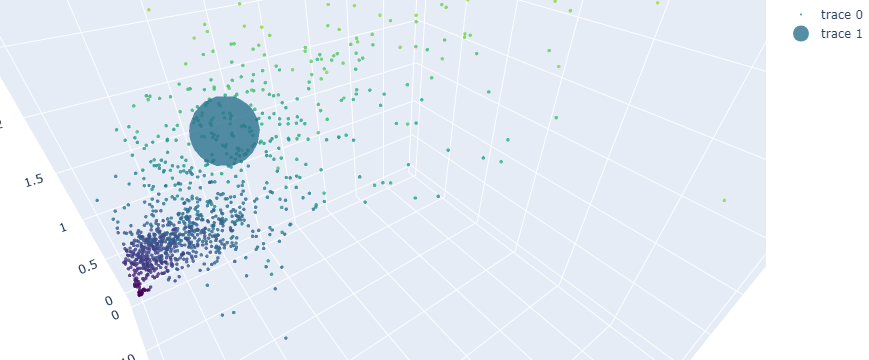

In [4]:
# Rotable 3-D plot
fig = go.Figure(data=[go.Scatter3d(
    x=vegc_collect,
    y=soilc_collect,
    z=gpp_collect,
    mode='markers',
    marker=dict(
        size=2,
        color=gpp_collect,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8),
)])
fig.add_trace(
    go.Scatter3d(x=[vegc_obs],
                 y=[soilc_obs],
                 z=[gpp_obs],
                 mode='markers',
                    marker=dict(
                      size=40,
                      color=gpp_collect,                # set color to an array/list of desired values
                      colorscale='Viridis',   # choose a colorscale
                      opacity=0.8
    ))
)
fig.update_layout(scene = dict(
                    xaxis_title='Veg C',
                    yaxis_title='Soil C',
                    zaxis_title='GPP'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.write_html("test.html") #Modifiy the html file
fig.show()


In [5]:
# Candidates of the ensemble
# Set false to get the full list of parameters
Get_candidates = True

# Case 1: target total vegetation carbon 
vegc_rg = [vegc_obs*0.7, vegc_obs*1.3]
soilc_rg = [soilc_obs*0.7, soilc_obs*1.3]
gpp_rg = [gpp_obs*0.7, gpp_obs*1.3]
candidates = []

for i in np.arange(0,1600):
    if (Get_candidates):
        if(vegc_collect[i] > vegc_rg[0] and vegc_collect[i] < vegc_rg[1]):
            if(soilc_collect[i] > soilc_rg[0] and soilc_collect[i] < soilc_rg[1]):
                if(gpp_collect[i] > gpp_rg[0] and gpp_collect[i] < gpp_rg[1]):
                    candidates.append(i)
    else:
        candidates.append(i)

# Case 2: target vegetation carbon for evergreen and deciduous separately
# Needleleaf
vegc_rg = [vegc_nl_obs*0.7, vegc_nl_obs*1.3]
soilc_rg = [soilc_obs*0.7, soilc_obs*1.3]
gpp_rg = [gpp_obs*0.7, gpp_obs*1.3]
candidates_nl = []

for i in np.arange(0,1600):
    if (Get_candidates):
        if(vegc_nl_collect[i] > vegc_rg[0] and vegc_nl_collect[i] < vegc_rg[1]):
            if(soilc_collect[i] > soilc_rg[0] and soilc_collect[i] < soilc_rg[1]):
                if(gpp_collect[i] > gpp_rg[0] and gpp_collect[i] < gpp_rg[1]):
                    candidates_nl.append(i)
    else:
        candidates_nl.append(i)
        
# Needleleaf
vegc_rg = [vegc_bl_obs*0.7, vegc_bl_obs*1.3]
soilc_rg = [soilc_obs*0.7, soilc_obs*1.3]
gpp_rg = [gpp_obs*0.7, gpp_obs*1.3]
candidates_bl = []

for i in np.arange(0,1600):
    if (Get_candidates):
        if(vegc_bl_collect[i] > vegc_rg[0] and vegc_bl_collect[i] < vegc_rg[1]):
            if(soilc_collect[i] > soilc_rg[0] and soilc_collect[i] < soilc_rg[1]):
                if(gpp_collect[i] > gpp_rg[0] and gpp_collect[i] < gpp_rg[1]):
                    candidates_bl.append(i)
    else:
        candidates_bl.append(i)
        
candidates_max = np.unique(np.array(candidates_nl+candidates_bl))

In [10]:
candidates = np.array([18, 135, 267, 291, 331, 352, 386, 420, 463, 471, 519, 541, 567, 834, 883, 916, 938, 994, 1006, 1068, 1241, 1246, 1374, 1431, 1500, 1530, 1580
])-1

In [35]:
vegc_nl_collect[37]

6.3077183

In [7]:
# List of parameters with certain perturbation
param_ranges_full = pd.read_csv('/global/homes/s/sshu3/FATES_MRV/parameter_file_sandbox/sr_ensemble_params.csv')
param_ranges = param_ranges_full[['param', 'value_mean', 'value_min', 'value_max', 'pft', 'organ']]

# number of parameters
n_params = len(param_ranges)

# number of PFTs - some are global so subtract one
n_pfts = len(pd.unique(param_ranges['pft'])) - 1

param_names = list(param_ranges.param)
pfts = list(param_ranges.pft)
organs = list(param_ranges.organ)

# print(param_ranges)
param_needle = param_names[0:12] + param_names[13:38]
param_broad = param_names[40:len(param_names)]
param_nopft = [param_names[12]]+ param_names[38:40]


In [10]:
# Only obtain parameter values from candidates

# Settings
param_value = []
broad_pft = 0
needle_pft = 1

# Choose a PFT or obtain all PFTs (pft_pick == -1)
pft_picked = 1

if(pft_picked == 0):
    candidates = candidates_bl
if(pft_picked == 1):
    candidates = candidates_nl

# Open and collect all parameter information from candidates within the ensemble
# Path to all members
param_prefix = '/global/homes/s/sshu3/FATES_MRV/parameter_file_sandbox/fates_params_sr_ens_'
for i in np.arange(0,1600):
    if(pft_picked == -1):
        for j in np.arange(0, len(candidates_max)):
            param_sample = []
            if (i == candidates_max[j]):
                if (Get_candidates):
                    print('Current candidate number: ', i+1)
                ens_num = str(candidates_max[j]+1).zfill(4)
                fpath = param_prefix+ens_num+'.nc'
                dtc = nc4.Dataset(fpath)
                for k in np.arange(0, len(param_needle)):
                    tmp = dtc[param_needle[k]][:]
                    # Either 1D or 2D
                    if (len(np.shape(tmp)) == 1):
                        param_sample.append(tmp[needle_pft])
                    else:
                        param_sample.append(tmp[0,needle_pft])
                for k in np.arange(0, len(param_broad)):
                    tmp = dtc[param_broad[k]][:]
                    # Either 1D or 2D
                    if (len(np.shape(tmp)) == 1):
                        param_sample.append(tmp[broad_pft])
                    else:
                        param_sample.append(tmp[0,broad_pft])
                for k in np.arange(0, len(param_nopft)):
                    tmp = dtc[param_nopft[k]][:]
                    if (len(np.shape(tmp)) == 1):
                        param_sample.append(tmp[0])
                    else:
                        param_sample.append(tmp)
                dtc.close()
                param_value.append(param_sample)
    else:
        for j in np.arange(0, len(candidates)):
            param_sample = []
            if (i == candidates[j]):
                if (Get_candidates):
                    print('Current candidate number: ', i+1)
                ens_num = str(candidates[j]+1).zfill(4)
                fpath = param_prefix+ens_num+'.nc'
                dtc = nc4.Dataset(fpath)
                if(pft_picked == needle_pft):
                    for k in np.arange(0, len(param_needle)):
                        tmp = dtc[param_needle[k]][:]
                        # Either 1D or 2D
                        if (len(np.shape(tmp)) == 1):
                            param_sample.append(tmp[needle_pft])
                        else:
                            param_sample.append(tmp[0,needle_pft])
                    for k in np.arange(0, len(param_nopft)):
                        tmp = dtc[param_nopft[k]][:]
                        if (len(np.shape(tmp)) == 1):
                            param_sample.append(tmp[0])
                        else:
                            param_sample.append(tmp)
                if(pft_picked == broad_pft):
                    for k in np.arange(0, len(param_broad)):
                        tmp = dtc[param_broad[k]][:]
                        # Either 1D or 2D
                        if (len(np.shape(tmp)) == 1):
                            param_sample.append(tmp[broad_pft])
                        else:
                            param_sample.append(tmp[0,broad_pft])
                    for k in np.arange(0, len(param_nopft)):
                        tmp = dtc[param_nopft[k]][:]
                        if (len(np.shape(tmp)) == 1):
                            param_sample.append(tmp[0])
                        else:
                            param_sample.append(tmp)
                dtc.close()
                param_value.append(param_sample)
  
# Merge all parameter information to a list
arr_param_value = np.array(param_value)
param_candidate_min = []
param_candidate_mean = []
param_candidate_max = []
param_candidate_std = []
# Get min/max range of each parameter
if(pft_picked == broad_pft):
    param_all = param_broad+param_nopft
else:
    if(pft_picked == needle_pft):
        param_all = param_needle+param_nopft
    else:
        param_all = param_needle+param_broad+param_nopft
for i in np.arange(0, len(param_all)):
    if (len(np.shape(arr_param_value)) == 1):
        param_candidate_min.append(np.nanmin(arr_param_value[i]))
        param_candidate_max.append(np.nanmax(arr_param_value[i]))
        param_candidate_mean.append(np.nanmean(arr_param_value[i]))
        param_candidate_std.append(np.nanstd(arr_param_value[i]))
    else:
        param_candidate_min.append(np.nanmin(arr_param_value[:,i]))
        param_candidate_max.append(np.nanmax(arr_param_value[:,i]))
        param_candidate_mean.append(np.nanmean(arr_param_value[:,i]))
        param_candidate_std.append(np.nanstd(arr_param_value[:,i]))

del tmp

Current candidate number:  38
Current candidate number:  135
Current candidate number:  256
Current candidate number:  258
Current candidate number:  271
Current candidate number:  283
Current candidate number:  293
Current candidate number:  331
Current candidate number:  367
Current candidate number:  379
Current candidate number:  380
Current candidate number:  382
Current candidate number:  386
Current candidate number:  507
Current candidate number:  555
Current candidate number:  678
Current candidate number:  712
Current candidate number:  717
Current candidate number:  718
Current candidate number:  807
Current candidate number:  813
Current candidate number:  853
Current candidate number:  939
Current candidate number:  965
Current candidate number:  1163
Current candidate number:  1256
Current candidate number:  1273
Current candidate number:  1496
Current candidate number:  1525
Current candidate number:  1528
Current candidate number:  1583


In [39]:
candidates_max+1)

52

In [19]:
# formulate a table and store range into csv file
tmp = np.column_stack((np.array(param_candidate_min),np.array(param_candidate_max),np.array(param_candidate_mean),np.array(param_candidate_std)))
df = pd.DataFrame(data=tmp, columns = ['candidate min', 'candidate max', 'candidate mean','candidate std'])
df.to_csv('/global/homes/s/sshu3/FATES_MRV/parameter_file_sandbox/candidate_range.csv', sep=',')
del tmp

### Take a closer look at needleleaf forest

Text(0, 0.5, 'Leaf C')

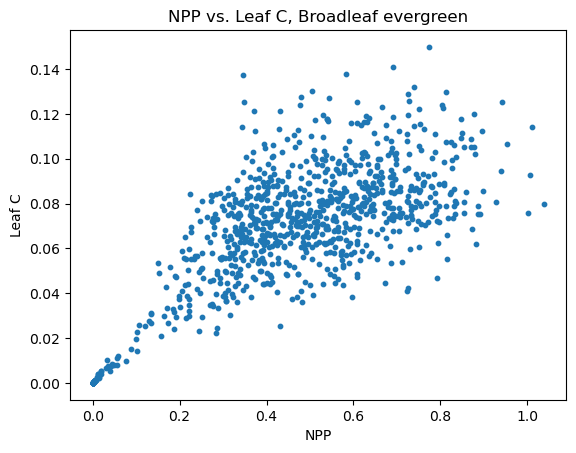

In [10]:
plt.scatter(npp_bl_collect, leafc_bl_collect, s=10)
plt.title('NPP vs. Leaf C, Broadleaf evergreen')
plt.xlabel('NPP')
plt.ylabel('Leaf C')

Text(0, 0.5, 'Leaf C')

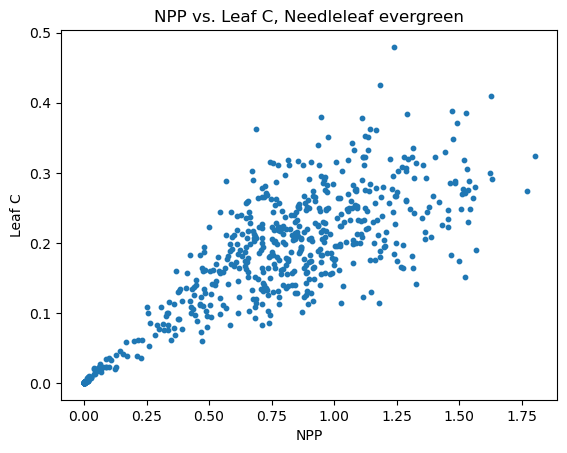

In [11]:
plt.scatter(npp_nl_collect, leafc_nl_collect, s=10)
plt.title('NPP vs. Leaf C, Needleleaf evergreen')
plt.xlabel('NPP')
plt.ylabel('Leaf C')

In [279]:
# Check the mean of parameters for certain case
biomass_thresh = 0.1
productivity_thresh = 0.1

arr_vegc = np.array(vegc_nl_collect)
arr_npp = np.array(npp_nl_collect)
idx_survived = np.logical_and(arr_vegc>biomass_thresh,arr_npp>productivity_thresh)
idx_dead_vegc = np.logical_and(arr_vegc<=biomass_thresh,arr_npp>productivity_thresh)
idx_dead_npp = np.logical_and(arr_vegc>biomass_thresh,arr_npp<=productivity_thresh)
idx_dead_completely = np.logical_and(arr_vegc<=biomass_thresh,arr_npp<=productivity_thresh)

# Only obtain parameter values from candidates

# Settings
param_value = []
broad_pft = 0
needle_pft = 1

# Choose a PFT
pft_picked = 1

# Open and collect all parameter information from candidates within the ensemble
# Path to all members
param_prefix = '/global/homes/s/sshu3/FATES_MRV/parameter_file_sandbox/fates_params_sr_ens_'
for i in np.arange(0,1600):
    for j in np.arange(0, len(candidates)):
        param_sample = []
        if (i == candidates[j]):
            if (Get_candidates):
                print('Current candidate number: ', i)
            ens_num = str(candidates[j]+1).zfill(4)
            fpath = param_prefix+ens_num+'.nc'
            dtc = nc4.Dataset(fpath)
            if(pft_picked == needle_pft):
                for k in np.arange(0, len(param_needle)):
                    tmp = dtc[param_needle[k]][:]
                    # Either 1D or 2D
                    if (len(np.shape(tmp)) == 1):
                        param_sample.append(tmp[needle_pft])
                    else:
                        param_sample.append(tmp[0,needle_pft])
                for k in np.arange(0, len(param_nopft)):
                    tmp = dtc[param_nopft[k]][:]
                    if (len(np.shape(tmp)) == 1):
                        param_sample.append(tmp[0])
                    else:
                        param_sample.append(tmp)
            if(pft_picked == broad_pft):
                for k in np.arange(0, len(param_broad)):
                    tmp = dtc[param_broad[k]][:]
                    # Either 1D or 2D
                    if (len(np.shape(tmp)) == 1):
                        param_sample.append(tmp[broad_pft])
                    else:
                        param_sample.append(tmp[0,broad_pft])
                for k in np.arange(0, len(param_nopft)):
                    tmp = dtc[param_nopft[k]][:]
                    if (len(np.shape(tmp)) == 1):
                        param_sample.append(tmp[0])
                    else:
                        param_sample.append(tmp)
            dtc.close()
            param_value.append(param_sample)
  
# Merge all parameter information to a list
arr_param_value = np.array(param_value)
param_candidate_min = []
param_candidate_mean = []
param_candidate_max = []
# Get min/max range of each parameter
if(pft_picked == broad_pft):
    param_all = param_broad+param_nopft
else:
    param_all = param_needle+param_nopft
for i in np.arange(0, len(param_all)):
    param_candidate_min.append(np.nanmin(arr_param_value[:,i]))
    param_candidate_max.append(np.nanmax(arr_param_value[:,i]))
    param_candidate_mean.append(np.nanmean(arr_param_value[:,i]))

del tmp



In [284]:
param_survived = np.array(param_value)[idx_survived, :]
param_dead_vegc = np.array(param_value)[idx_dead_vegc, :]
param_dead_npp = np.array(param_value)[idx_dead_npp, :]
param_dead_comp = np.array(param_value)[idx_dead_completely,:]

param_survived_m = np.nanmean(param_survived[:,:], axis=0)
param_dead_vegc_m = np.nanmean(param_dead_vegc[:,:], axis=0)
param_dead_npp_m = np.nanmean(param_dead_npp[:,:], axis=0)
param_dead_comp_m = np.nanmean(param_dead_comp[:,:], axis=0)

rel_diff_vegc = 100*(param_survived_m - param_dead_vegc_m) / param_survived_m
rel_diff_npp = 100*(param_survived_m - param_dead_npp_m) / param_survived_m

/tmp/ipykernel_1659734/1266464840.py:7: RuntimeWarning:

Mean of empty slice



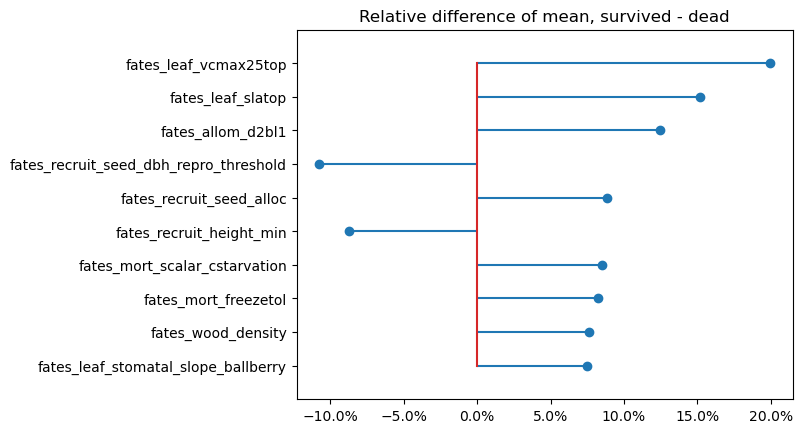

In [285]:
# Plot difference of mean for top 10 parameters
# VegC < 0.1
order_maxvar = np.abs(rel_diff_npp[:]).argsort()[::-1]
order_maxvar_t10 = order_maxvar[0:10]
# Pick top 10
plt.stem(rel_diff_npp[order_maxvar_t10], orientation='horizontal')
plt.ylim([10, -1])

arr_param = np.array(param_all)
labels = arr_param[order_maxvar_t10]
plt.yticks(np.arange(0,10), labels)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Relative difference of mean, survived - dead')
# ax.set_ylabel('Soil carbon, kgC m-2')
# ax.set_zlabel('Gross Primary Productivity, kgC m-2 yr-1')
# fig.tight_layout()
plt.show()


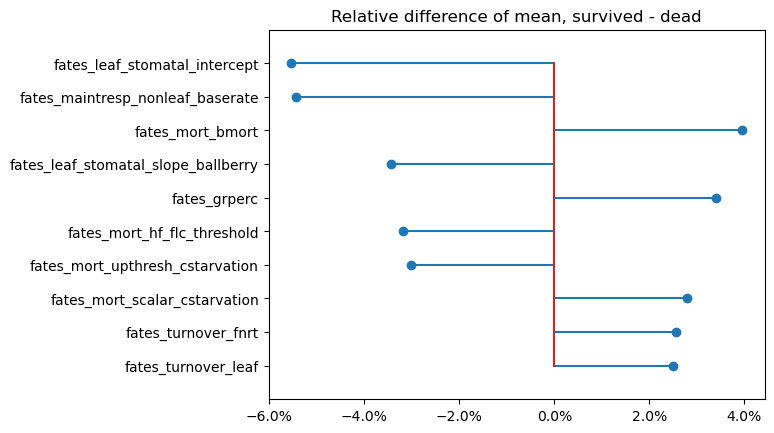

In [251]:
# Plot difference of mean for top 10 parameters
# VegC < 0.1
order_maxvar = np.abs(rel_diff_npp[:]).argsort()[::-1]
order_maxvar_t10 = order_maxvar[0:10]
# Pick top 10
plt.stem(rel_diff_npp[order_maxvar_t10], orientation='horizontal')
plt.ylim([10, -1])

arr_param = np.array(param_all)
labels = arr_param[order_maxvar_t10]
plt.yticks(np.arange(0,10), labels)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Relative difference of mean, survived - dead')
# ax.set_ylabel('Soil carbon, kgC m-2')
# ax.set_zlabel('Gross Primary Productivity, kgC m-2 yr-1')
# fig.tight_layout()
plt.show()


### Variance based sensitivity

In [12]:
# Contribution of each feature (parameter) to the target (vegc, soilc and gpp) following Koven 2020.
# First, filter out members with vegetation biomass less than 0.1 or GPP less than 0,1, since these members 
# did not survive or struggle to survive.
biomass_thresh = 0.1
productivity_thresh = 0.1

if(pft_picked == broad_pft):
    arr_vegc = np.array(vegc_bl_collect)
    arr_gpp = np.array(gpp_bl_collect)
    arr_soilc = np.array(soilc_collect)
    sel_vegc = arr_vegc[np.logical_and(arr_vegc>biomass_thresh,arr_gpp>productivity_thresh)]
    sel_gpp = arr_gpp[np.logical_and(arr_vegc>biomass_thresh,arr_gpp>productivity_thresh)]
    sel_soilc = arr_soilc[np.logical_and(arr_vegc>biomass_thresh,arr_gpp>productivity_thresh)]
else:
    if(pft_picked == needle_pft):
        arr_vegc = np.array(vegc_nl_collect)
        arr_gpp = np.array(gpp_nl_collect)
        arr_soilc = np.array(soilc_collect)
        sel_vegc = arr_vegc[np.logical_and(arr_vegc>biomass_thresh,arr_gpp>productivity_thresh)]
        sel_gpp = arr_gpp[np.logical_and(arr_vegc>biomass_thresh,arr_gpp>productivity_thresh)]
        sel_soilc = arr_soilc[np.logical_and(arr_vegc>biomass_thresh,arr_gpp>productivity_thresh)]
    else:
        arr_vegc = np.array(vegc_collect)
        arr_gpp = np.array(gpp_collect)
        arr_soilc = np.array(soilc_collect)
        sel_vegc = arr_vegc[np.logical_and(arr_vegc>biomass_thresh,arr_gpp>productivity_thresh)]
        sel_gpp = arr_gpp[np.logical_and(arr_vegc>biomass_thresh,arr_gpp>productivity_thresh)]
        sel_soilc = arr_soilc[np.logical_and(arr_vegc>biomass_thresh,arr_gpp>productivity_thresh)]
        
sample_survived = np.squeeze((np.logical_and(arr_vegc>biomass_thresh,arr_gpp>productivity_thresh)).nonzero())

arr_param_value = np.array(param_value)
sel_param_value = arr_param_value[sample_survived,:]

In [86]:
np.shape(sel_param_value)

(516, 40)

In [13]:
# first calculate the potential variance decomposition
obj = [gpp_obs, vegc_obs, soilc_obs]

nobj = len(obj)
nparams = np.shape(sel_param_value)[1]
nsamples = np.shape(sel_param_value)[0]
potential_variance_decomposition_data = np.zeros([nobj, nparams])

# Maximum variance decomposition
for var_i in range(nobj):
    for par_i in range(nparams):
        if (var_i == 0):
            y_unordered = sel_gpp[:]
        if (var_i == 1):
            y_unordered = sel_vegc[:]
        if (var_i == 2):
            y_unordered = sel_soilc[:]
        x_unordered = sel_param_value[:,par_i]
        order = x_unordered.argsort()
        x = x_unordered[order]
        y = y_unordered[order]
        #
        thespline = interpolate.UnivariateSpline(x, y, s=1e10, k=3)
        spline_prediction = thespline(x)
        #
        potential_variance_decomposition_data[var_i,par_i] = spline_prediction.var() / y.var()

# Minimum variance decomposition
minimum_variance_decomposition_data = np.zeros([nobj,nparams])

for var_i in range(nobj):
    for par_i in range(nparams):
        # to calculate the minimum variance, first subtract the fraction explained by all other variables
        if (var_i == 0):
            y_unordered = sel_gpp[:]
        if (var_i == 1):
            y_unordered = sel_vegc[:]
        if (var_i == 2):
            y_unordered = sel_soilc[:]
        y_unordered_residual = y_unordered.copy()
        for par_j in range(nparams):
            if par_i != par_j:
                #
                x_unordered_othervar = sel_param_value[:,par_j]
                order_othervar = x_unordered_othervar.argsort()
                order_othervar_togetback = order_othervar.argsort()
                #
                x_othervar = x_unordered_othervar[order_othervar]
                y_othervar = y_unordered_residual[order_othervar]                
                #
                thespline_othervar = interpolate.UnivariateSpline(x_othervar, y_othervar, s=1e10, k=3)
                spline_prediction_othervar = thespline_othervar(x_othervar)
               
                y_unordered_residual = y_unordered_residual - spline_prediction_othervar[order_othervar_togetback]

        x_unordered = sel_param_value[:,par_i]
        order = x_unordered.argsort()
        x = x_unordered[order]
        y_residual = y_unordered_residual[order]
        y = y_unordered[order]
        #
        thespline_residual = interpolate.UnivariateSpline(x, y_residual, s=1e10, k=3)
        spline_prediction_residual = thespline_residual(x)
        #
        minimum_variance_decomposition_data[var_i,par_i] = spline_prediction_residual.var() / y.var()

In [14]:
nsamples

532

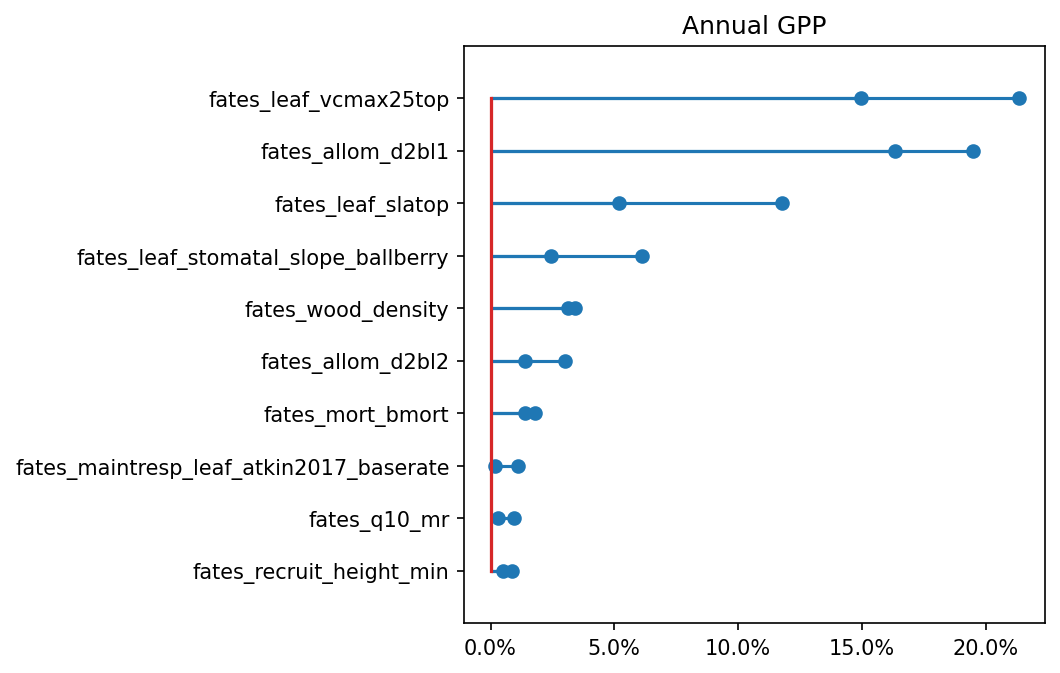

In [15]:
# Stem plot to show variance based sensitivity
# GPP
agg = np.greater(minimum_variance_decomposition_data[0,:], potential_variance_decomposition_data[0,:])
agg_variance_decomposition_data = np.zeros((nparams))
for i in np.arange(0,nparams):
    if(agg[i]):
        agg_variance_decomposition_data[i] = minimum_variance_decomposition_data[0,i]
    else:
        agg_variance_decomposition_data[i] = potential_variance_decomposition_data[0,i]
        
fig = plt.figure(figsize=(5,5), dpi=150)

order_maxvar = agg_variance_decomposition_data[:].argsort()[::-1]
order_maxvar_t10 = order_maxvar[0:10]
# Pick top 10
plt.stem(100*potential_variance_decomposition_data[0,order_maxvar_t10], orientation='horizontal')
plt.stem(100*minimum_variance_decomposition_data[0,order_maxvar_t10], orientation='horizontal')
plt.ylim([10, -1])

arr_param = np.array(param_all)
labels = arr_param[order_maxvar_t10]
plt.yticks(np.arange(0,10), labels)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Annual GPP')
# ax.set_ylabel('Soil carbon, kgC m-2')
# ax.set_zlabel('Gross Primary Productivity, kgC m-2 yr-1')
# fig.tight_layout()
plt.show()


In [104]:
minimum_variance_decomposition_data[1,order_maxvar_t10]

array([0.16801658, 0.04408211, 0.11078358, 0.05743795, 0.02204554,
       0.08249111, 0.01183396, 0.00661373, 0.04384583, 0.01792241])

In [295]:
agg

array([False, False,  True, False, False, False,  True,  True, False,
        True,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False])

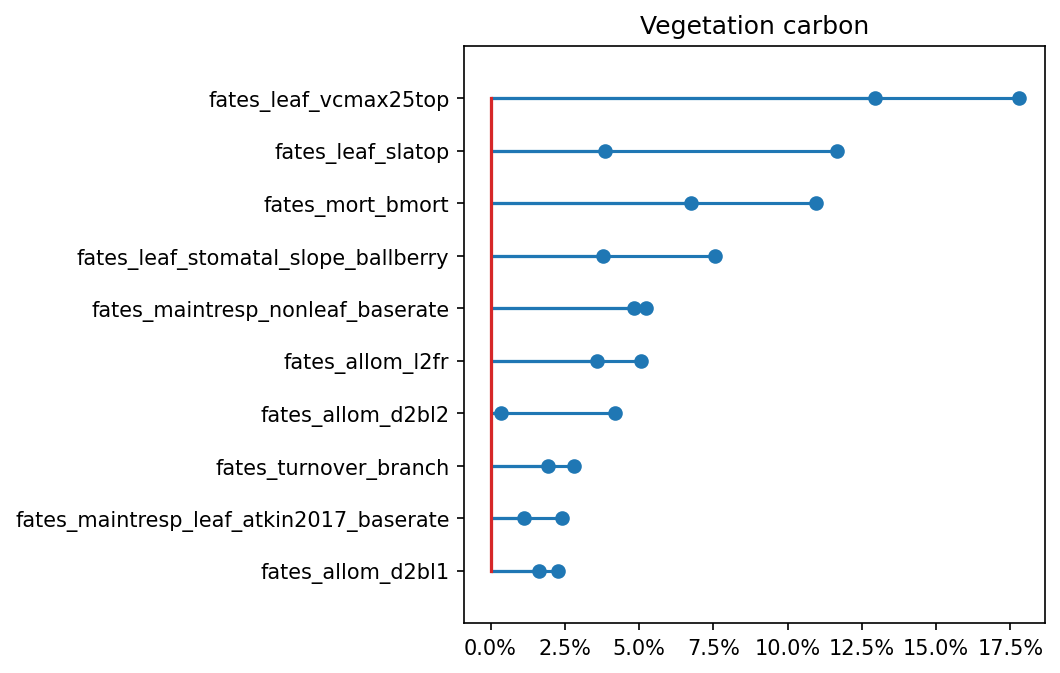

In [16]:
# vegetation carbon
agg = np.greater(minimum_variance_decomposition_data[1,:], potential_variance_decomposition_data[1,:])
agg_variance_decomposition_data = np.zeros((nparams))
for i in np.arange(0,nparams):
    if(agg[i]):
        agg_variance_decomposition_data[i] = minimum_variance_decomposition_data[1,i]
    else:
        agg_variance_decomposition_data[i] = potential_variance_decomposition_data[1,i]

fig = plt.figure(figsize=(5,5), dpi=150)

order_maxvar = agg_variance_decomposition_data[:].argsort()[::-1]
order_maxvar_t10 = order_maxvar[0:10]
# Pick top 10
plt.stem(100*potential_variance_decomposition_data[1,order_maxvar_t10], orientation='horizontal')
plt.stem(100*minimum_variance_decomposition_data[1,order_maxvar_t10], orientation='horizontal')
plt.ylim([10, -1])

arr_param = np.array(param_all)
labels = arr_param[order_maxvar_t10]
plt.yticks(np.arange(0,10), labels)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Vegetation carbon')
# ax.set_ylabel('Soil carbon, kgC m-2')
# ax.set_zlabel('Gross Primary Productivity, kgC m-2 yr-1')
# fig.tight_layout()
plt.show()


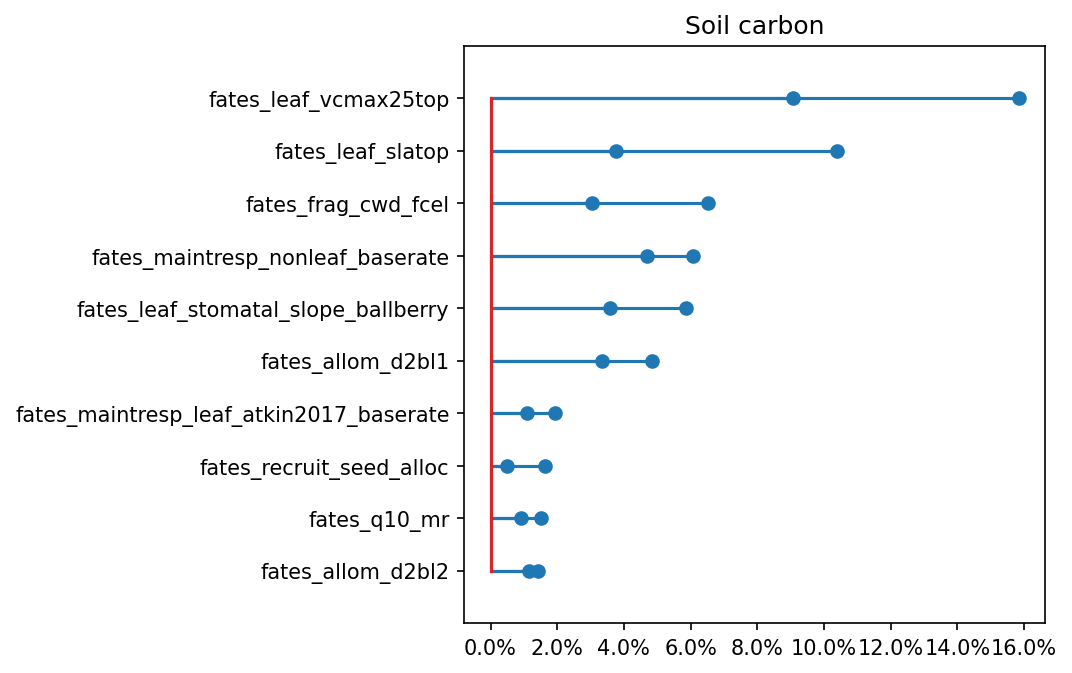

In [17]:
# soil carbon
agg = np.greater(minimum_variance_decomposition_data[2,:], potential_variance_decomposition_data[2,:])
agg_variance_decomposition_data = np.zeros((nparams))
for i in np.arange(0,nparams):
    if(agg[i]):
        agg_variance_decomposition_data[i] = minimum_variance_decomposition_data[2,i]
    else:
        agg_variance_decomposition_data[i] = potential_variance_decomposition_data[2,i]

fig = plt.figure(figsize=(5,5), dpi=150)

order_maxvar = agg_variance_decomposition_data[:].argsort()[::-1]
order_maxvar_t10 = order_maxvar[0:10]
# Pick top 10
plt.stem(100*potential_variance_decomposition_data[2,order_maxvar_t10], orientation='horizontal')
plt.stem(100*minimum_variance_decomposition_data[2,order_maxvar_t10], orientation='horizontal')
plt.ylim([10, -1])

arr_param = np.array(param_all)
labels = arr_param[order_maxvar_t10]
plt.yticks(np.arange(0,10), labels)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Soil carbon')
# ax.set_ylabel('Soil carbon, kgC m-2')
# ax.set_zlabel('Gross Primary Productivity, kgC m-2 yr-1')
# fig.tight_layout()
plt.show()

In [96]:
order_maxvar_t10 = order_maxvar[0:10]
order_maxvar_t10

array([ 9, 11, 38, 10, 39,  2,  6,  5,  3, 15])

In [98]:
order_maxvar_t10

array([ 9, 11, 38, 10, 39,  2,  6,  5,  3, 15])

In [101]:
potential_variance_decomposition_data[2,potential_variance_decomposition_data[2,:].argsort()[::-1]]*100

array([10.8395282 , 10.17971069,  9.63285204,  4.45498802,  2.18192286,
        1.89392789,  1.76235923,  1.69374765,  1.34881095,  1.20877635,
        0.99164461,  0.98330953,  0.98309688,  0.95892149,  0.85192169,
        0.80613835,  0.79837542,  0.75369806,  0.72291065,  0.68362078,
        0.64573451,  0.59646678,  0.50589703,  0.50475631,  0.48552436,
        0.42276125,  0.31320099,  0.31080662,  0.30982906,  0.2965499 ,
        0.28229044,  0.27979265,  0.26434782,  0.25649345,  0.24841493,
        0.20649588,  0.20562044,  0.18638733,  0.12611314,  0.07716727])

In [ ]:
minimum_variance_decomposition_data[]

In [ ]:
potential_variance_decomposition_data[2,]

### Visualization

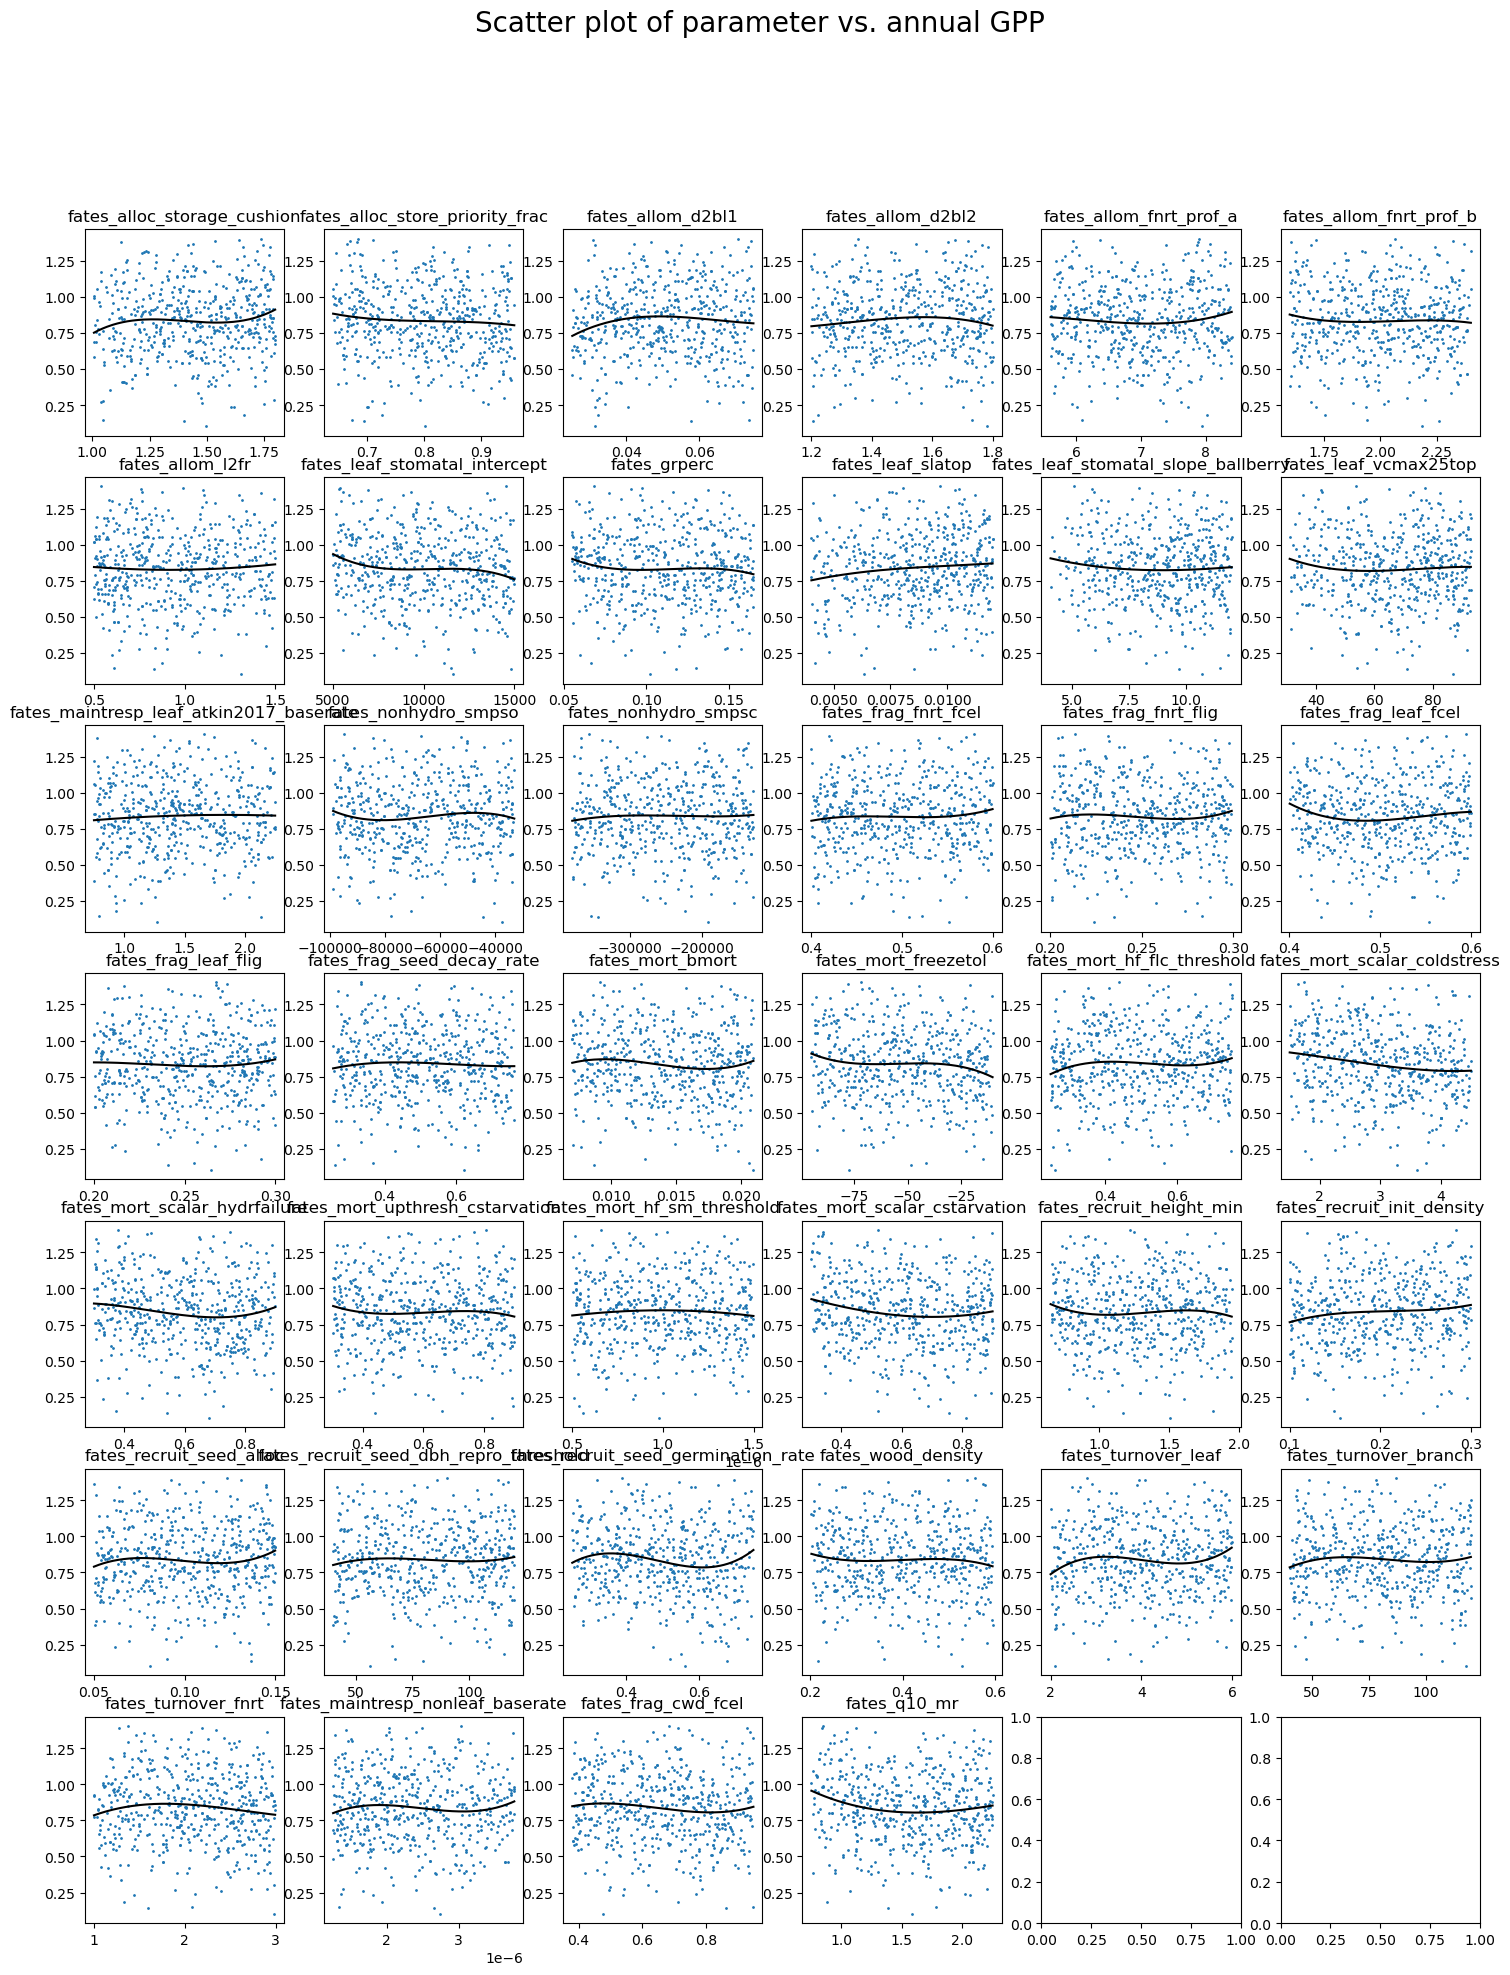

In [72]:
# Make a scatter plot with all parameters against GPP
fig, axs = plt.subplots(7, 6)
fig.set_figheight(22)
fig.set_figwidth(18)

for i in np.arange(0, 7):
    for j in np.arange(0, 6):
        param_idx = i*6+j
        if (param_idx < 40):
            y_unordered = sel_gpp[:]
            x_unordered = sel_param_value[:,param_idx]
            order = x_unordered.argsort()
            x = x_unordered[order]
            y = y_unordered[order]
            thespline = interpolate.UnivariateSpline(x, y, k=3)
            spline_prediction = thespline(x)
            
            axs[i, j].scatter(sel_param_value[:,param_idx], sel_gpp[:], s = 1)
            axs[i, j].plot(x, spline_prediction, 'k-')
            if (param_idx < 37):
                axs[i, j].set_title(param_broad[param_idx])
            else:
                axs[i, j].set_title(param_nopft[param_idx-37])
fig.suptitle('Scatter plot of parameter vs. annual GPP', fontsize=20)
# fig.tight_layout()
plt.show()

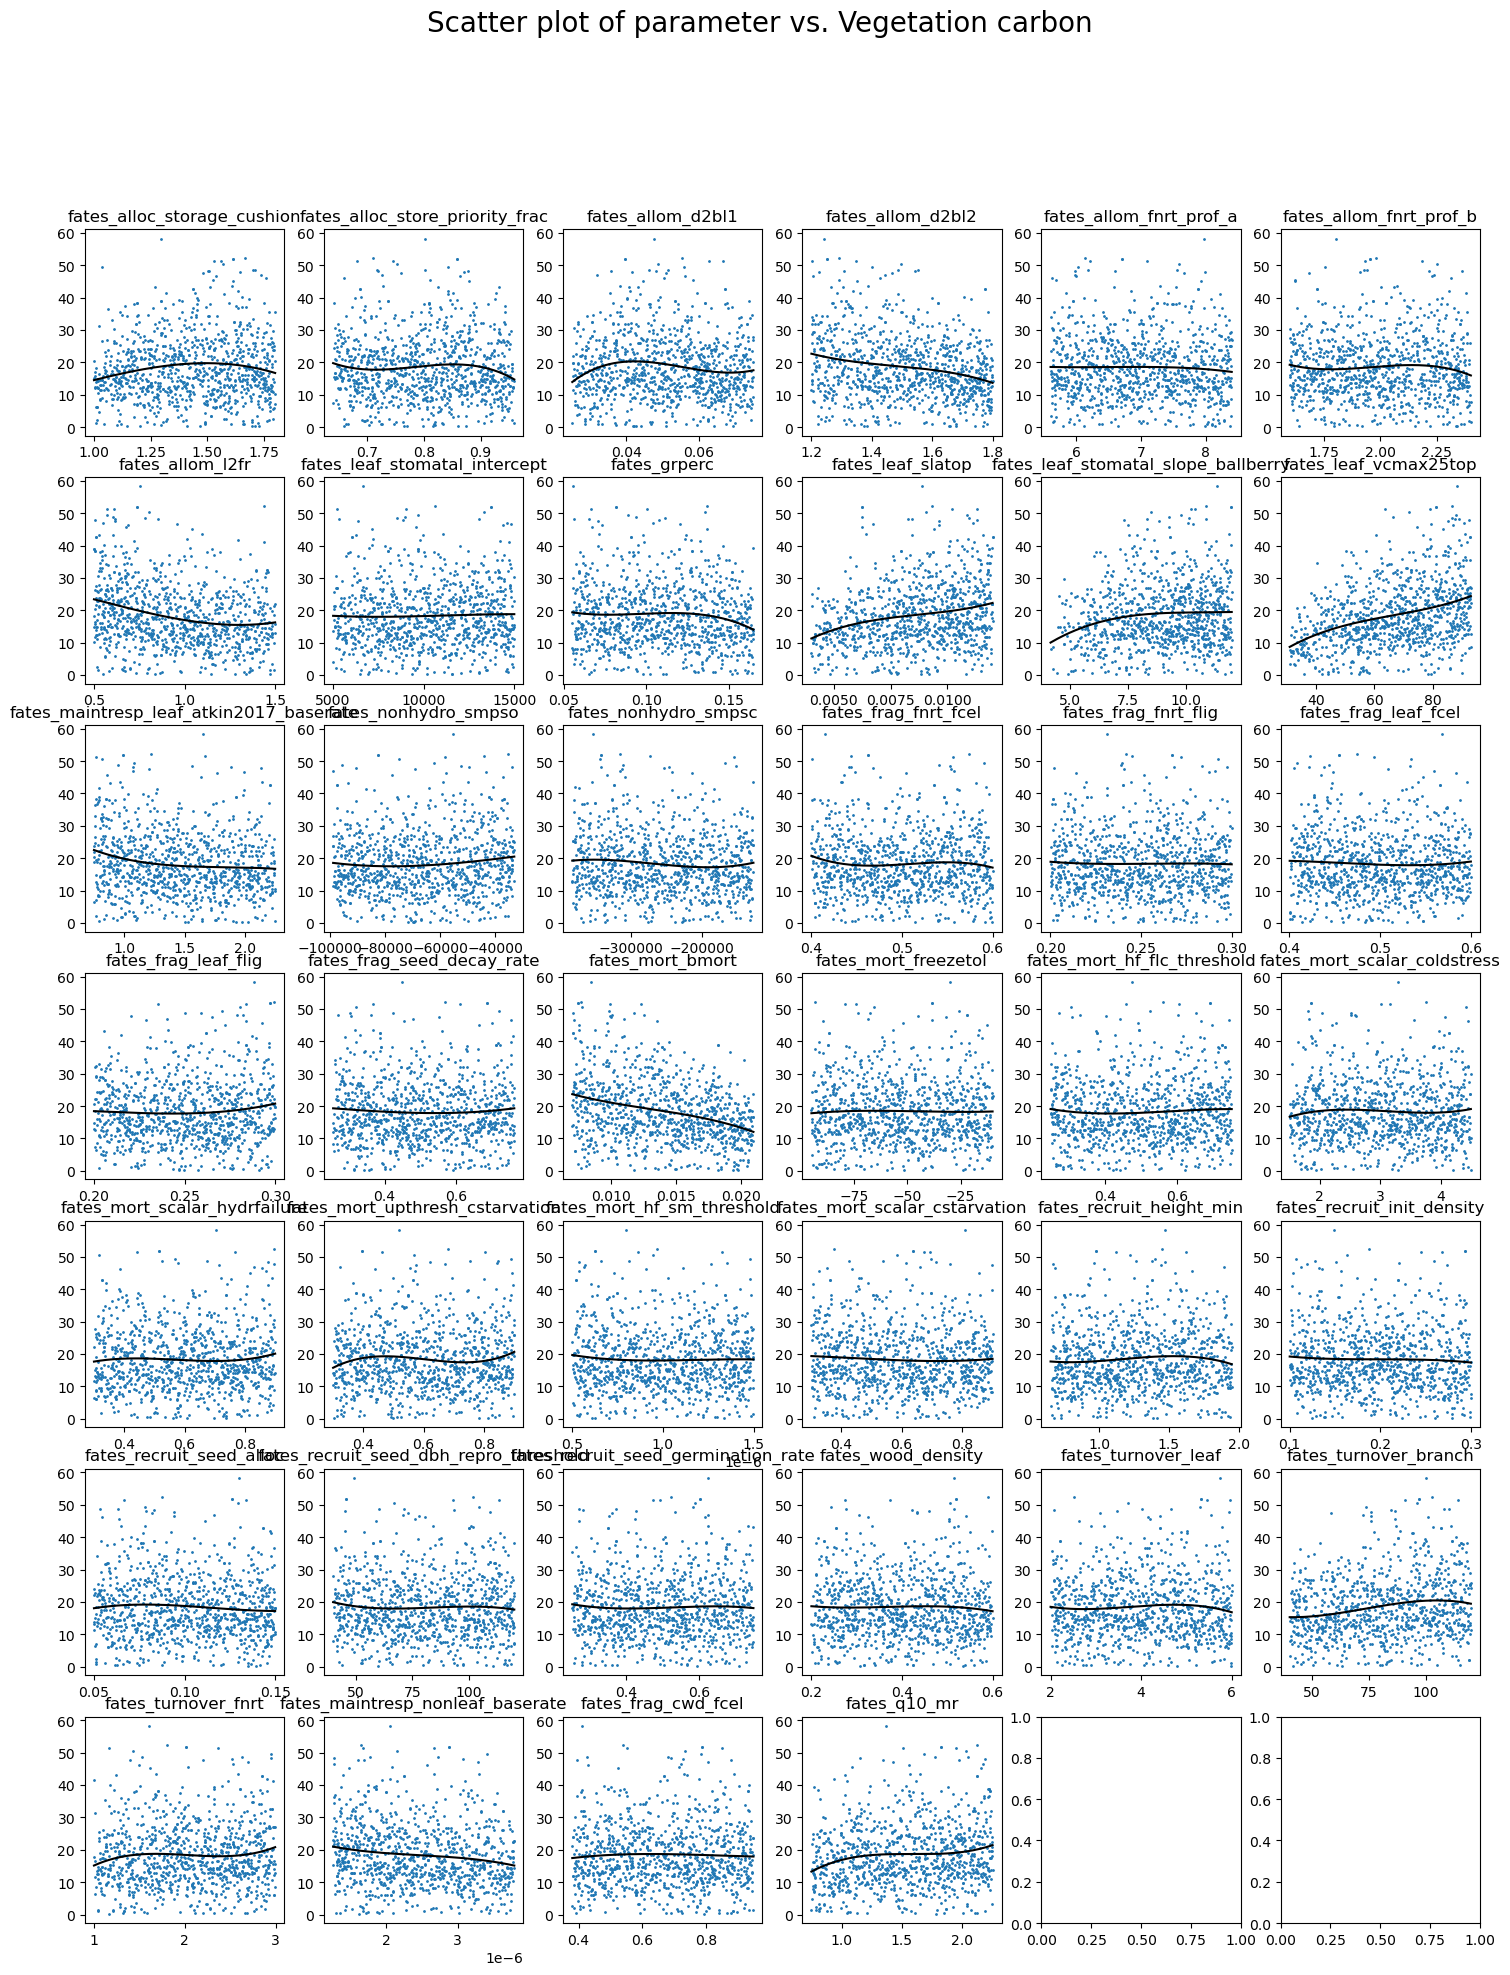

In [13]:
# Make a scatter plot with all parameters against vegetation carbon
fig, axs = plt.subplots(7, 6)
fig.set_figheight(22)
fig.set_figwidth(18)

for i in np.arange(0, 7):
    for j in np.arange(0, 6):
        param_idx = i*6+j
        if (param_idx < 40):
            y_unordered = sel_vegc[:]
            x_unordered = sel_param_value[:,param_idx]
            order = x_unordered.argsort()
            x = x_unordered[order]
            y = y_unordered[order]
            thespline = interpolate.UnivariateSpline(x, y, s=1e10, k=3)
            spline_prediction = thespline(x)
            
            axs[i, j].scatter(sel_param_value[:,param_idx], sel_vegc[:], s = 1)
            axs[i, j].plot(x, spline_prediction, 'k-')
            if (param_idx < 37):
                axs[i, j].set_title(param_broad[param_idx])
            else:
                axs[i, j].set_title(param_nopft[param_idx-37])
fig.suptitle('Scatter plot of parameter vs. Vegetation carbon', fontsize=20)
# fig.tight_layout()
plt.show()

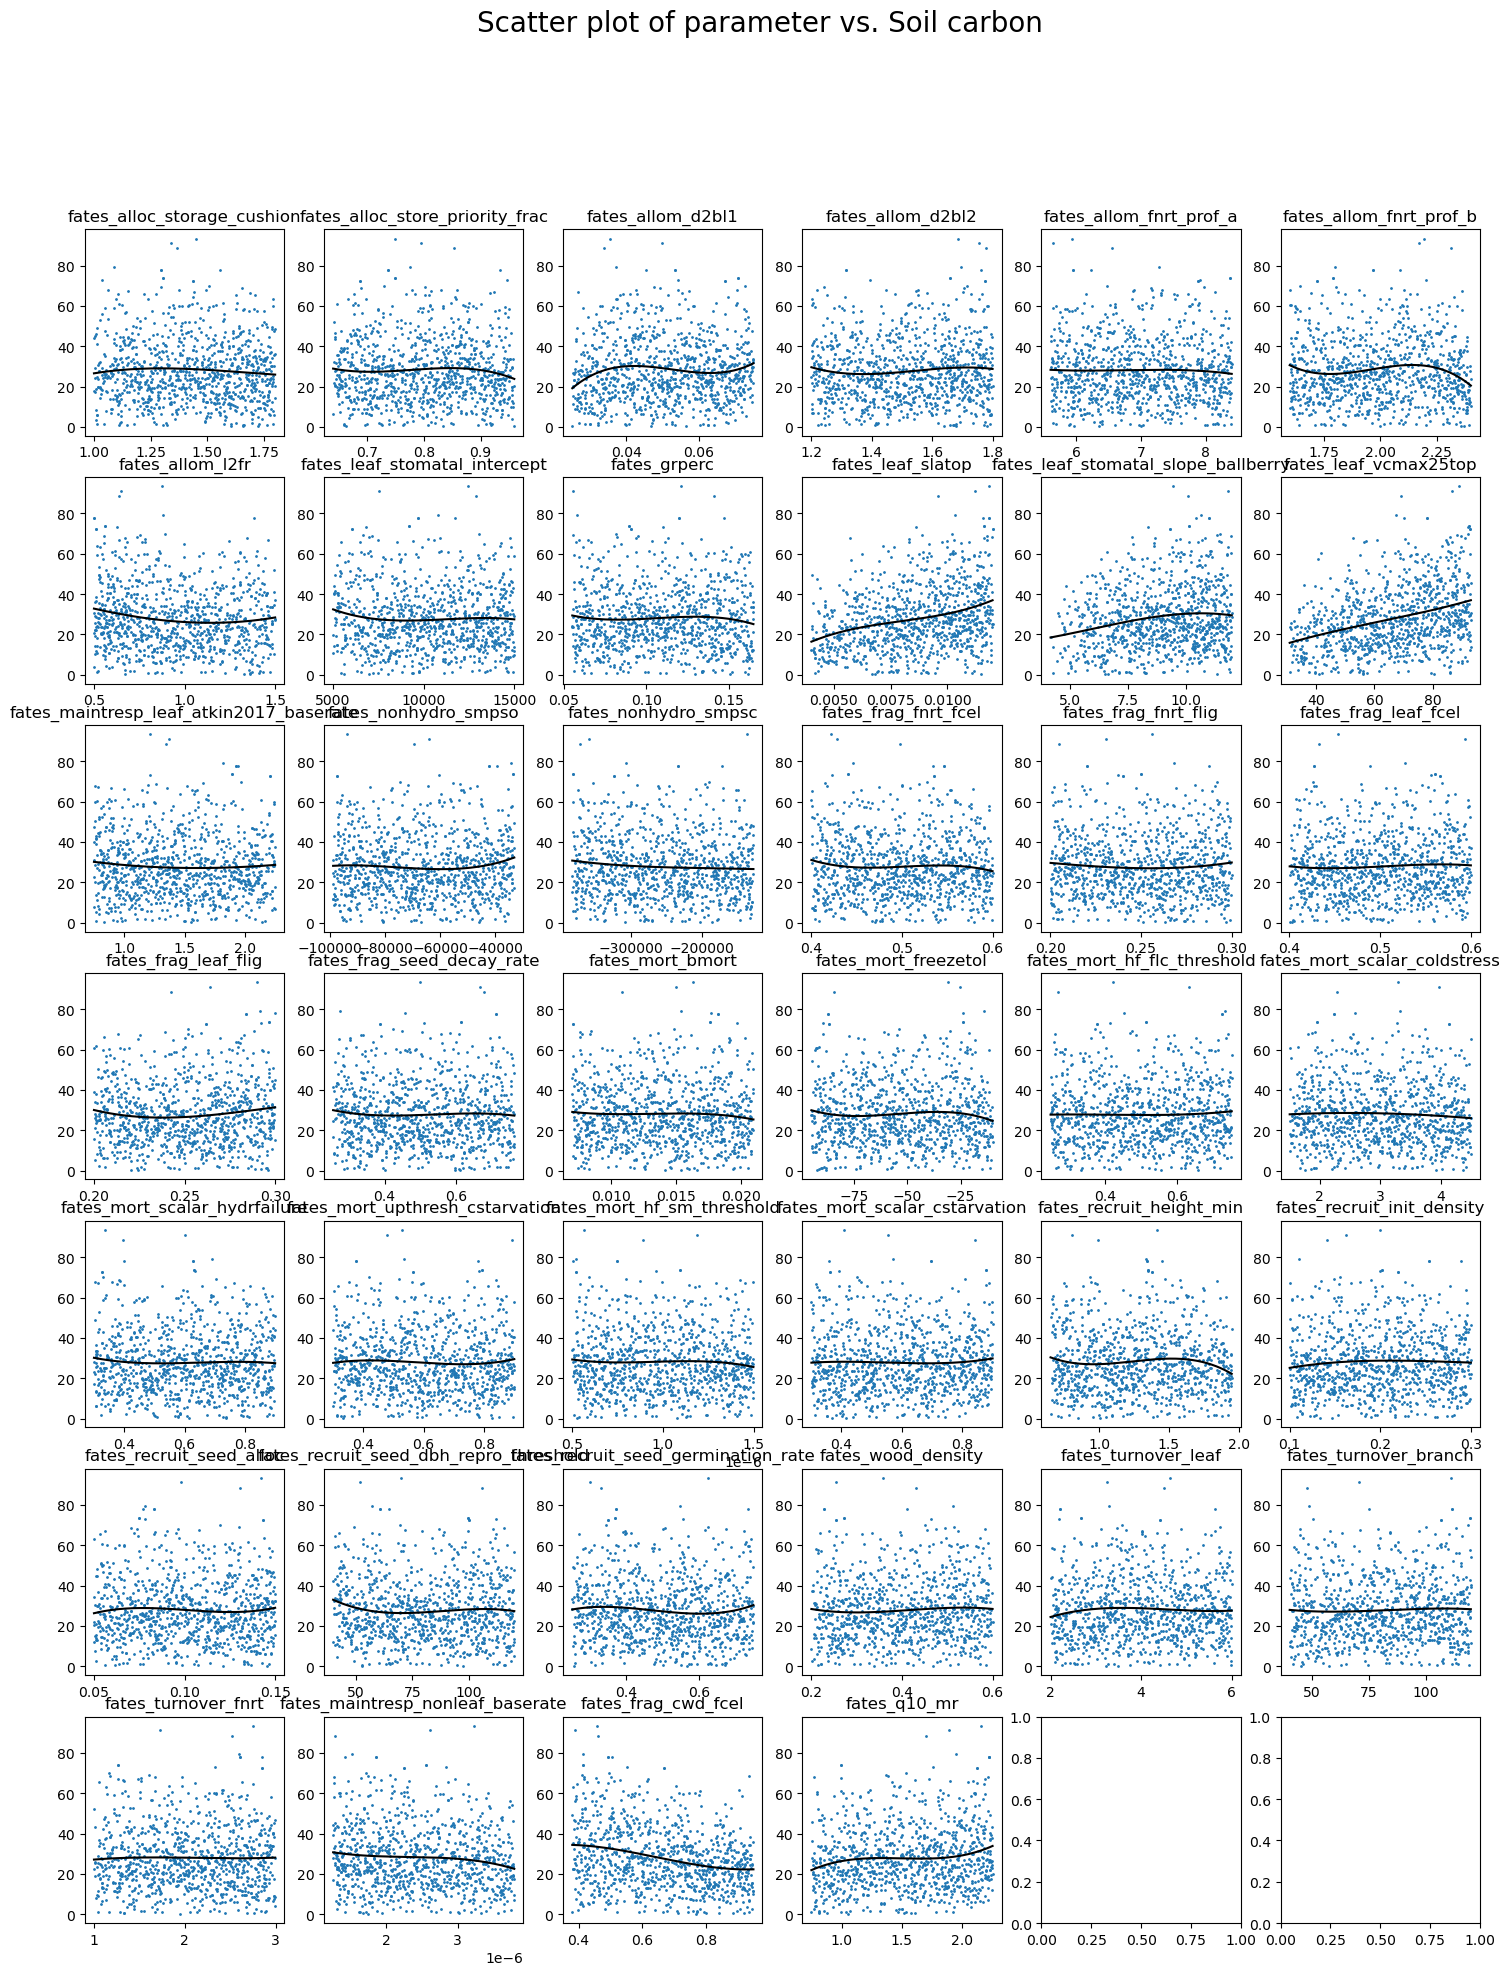

In [15]:
# Make a scatter plot with all parameters against soil carbon
fig, axs = plt.subplots(7, 6)
fig.set_figheight(22)
fig.set_figwidth(18)

for i in np.arange(0, 7):
    for j in np.arange(0, 6):
        param_idx = i*6+j
        if (param_idx < 40):
            y_unordered = sel_soilc[:]
            x_unordered = sel_param_value[:,param_idx]
            order = x_unordered.argsort()
            x = x_unordered[order]
            y = y_unordered[order]
            thespline = interpolate.UnivariateSpline(x, y, s=1e10, k=3)
            spline_prediction = thespline(x)
            
            axs[i, j].scatter(sel_param_value[:,param_idx], sel_soilc[:], s = 1)
            axs[i, j].plot(x, spline_prediction, 'k-')
            if (param_idx < 37):
                axs[i, j].set_title(param_broad[param_idx])
            else:
                axs[i, j].set_title(param_nopft[param_idx-37])
fig.suptitle('Scatter plot of parameter vs. Soil carbon', fontsize=20)
# fig.tight_layout()
plt.show()

### Examine candidates parameters

In [66]:
# Parameter list of all candidates
arr_param_value = np.array(param_value)
df_params = pd.DataFrame(arr_param_value, columns=param_all)
df_params

fates_alloc_storage_cushion  fates_alloc_store_priority_frac  \
0                      1.528260                         0.904462   
1                      1.629028                         0.716847   
2                      1.685720                         0.869554   
3                      1.191816                         0.742743   
4                      1.065047                         0.790980   
5                      1.652034                         0.903322   
6                      1.756168                         0.903835   
7                      1.554432                         0.881971   
8                      1.216084                         0.866575   
9                      1.162215                         0.917213   
10                     1.170015                         0.736521   
11                     1.366861                         0.929758   
12                     1.792836                         0.739952   
13                     1.718819                         0.881352   
14                     1.797933                         0.708718   
15                     1.653478                         0.841226   
16                     1.226471                         0.693815   
17                     1.389199                         0.753011   
18                     1.115621                         0.857783   
19                     1.096693                         0.857497   
20                     1.652946                         0.930777   
21                     1.661280                         0.750017   
22                     1.771587                         0.847957   
23                     1.602953                         0.934744   
24                     1.297305                         0.934082   
25                     1.766490                         0.675182   
26                     1.217442                         0.780596   

    fates_allom_d2bl1  fates_allom_d2bl2  fates_allom_fnrt_prof_a  \
0            0.033131           1.507946                 7.448056   
1            0.042586           1.711780                 5.968654   
2            0.042227           1.746014                 6.940353   
3            0.066653           1.425251                 7.381117   
4            0.066122           1.778219                 7.541697   
5            0.026081           1.721238                 7.552916   
6            0.063890           1.546879                 7.636010   
7            0.063796           1.663069                 6.253111   
8            0.039284           1.778945                 7.131659   
9            0.065729           1.784039                 7.234949   
10           0.025147           1.317084                 5.799901   
11           0.061230           1.290631                 8.248576   
12           0.059462           1.411931                 6.228236   
13           0.055696           1.579876                 6.888233   
14           0.048274           1.558771                 6.439872   
15           0.049708           1.275632                 7.329650   
16           0.056899           1.460537                 6.187561   
17           0.039523           1.652175                 7.241942   
18           0.074909           1.539216                 7.745558   
19           0.034375           1.497511                 7.778391   
20           0.053817           1.555308                 6.736231   
21           0.025676           1.418482                 7.409949   
22           0.067849           1.386141                 7.444214   
23           0.047556           1.617922                 7.080046   
24           0.061662           1.570943                 6.299200   
25           0.058980           1.407563                 6.906702   
26           0.044737           1.625311                 5.833588   

    fates_allom_fnrt_prof_b  fates_allom_l2fr  fates_leaf_stomatal_intercept  \
0                  2.252459          0.864323                   10786.285968   
1     

### Check ecophysiological constrains, size-class structure and age structure

In [7]:
oak_pine_df = pd.read_csv('Size_distributions_Puebla.csv')

In [8]:
oak_pine_df

lower_bin_edge         All         Oak        Pine
0             7.5  829.444444  284.444444  210.000000
1            15.0  227.222222   74.444444   86.111111
2            20.0  214.444444   70.000000   63.888889
3            30.0  124.444444   30.555556   53.333333
4            40.0   50.555556    6.111111   36.666667
5            50.0   33.333333    2.777778   28.888889
6            60.0    0.000000    0.000000    0.000000

In [12]:
# Open the file and obtain the last value
# This step will take much longer than expected.
start = time.time()

block_ens = [255, 145, 400, 400, 400]
# Path to all ensemble members
block_path = ['/pscratch/sd/s/sshu3/FATES_MRV/fates_test_2024-02-12_e9515ed7a8_5d40c9e6/run/', \
              '/pscratch/sd/s/sshu3/FATES_MRV/fates_test256_2024-02-12_e9515ed7a8_5d40c9e6/run/', \
              '/pscratch/sd/s/sshu3/FATES_MRV/fates_test401_2024-02-12_e9515ed7a8_5d40c9e6/run/', \
              '/pscratch/sd/s/sshu3/FATES_MRV/fates_test801_2024-02-12_e9515ed7a8_5d40c9e6/run/', \
              '/pscratch/sd/s/sshu3/FATES_MRV/fates_test1201_2024-02-13_e9515ed7a8_5d40c9e6/run/']
block_prefix = ['fates_test_2024-02-12_e9515ed7a8_5d40c9e6.elm_',\
               'fates_test256_2024-02-12_e9515ed7a8_5d40c9e6.elm_', \
               'fates_test401_2024-02-12_e9515ed7a8_5d40c9e6.elm_', \
               'fates_test801_2024-02-12_e9515ed7a8_5d40c9e6.elm_', \
               'fates_test1201_2024-02-13_e9515ed7a8_5d40c9e6.elm_']

# Var lists
num_sz_collect = []
gpp_collect = []
gpp_bl_collect = []
gpp_nl_collect = []
npp_collect = []
npp_bl_collect = []
npp_nl_collect = []
lai_collect = []
vegc_collect = []
vegc_bl_collect = []
vegc_nl_collect = []
leafc_collect = []
leafc_bl_collect = []
leafc_nl_collect = []
reprodc_collect = []
sapwoodc_collect = []
storec_collect = []
frc_collect = []
rec_collect = []
mort_collect = []
litter_collect = []
soilc_collect = []

# Loop through blocks
for i in candidates:
    block_ind = np.float64(i)/400.0
    if(block_ind < 0.6375):
        k = 0
        ens = i
    else:
        if(block_ind < 1.0):
            k = 1
            ens = i-255
        else:
            if(block_ind < 2.0):
                k = 2
                ens = i - 400
            else:
                if(block_ind < 3.0):
                    k = 3
                    ens = i - 800
                else:
                    k = 4
                    ens = i - 1200
    ens_num = str(ens+1).zfill(4)
    # Some issue causes the last 400 ensemble member not finishing the job
    # Use the latest available output
#     print('Current block number: ', k)
#     print('Current ens_num number: ', ens)
    fpath = block_path[k] + block_prefix[k]+ens_num+'.h0.2010-02-01-00000.nc'
    dtc = nc4.Dataset(fpath)
    dnum_sz = dtc['FATES_NPLANT_SZ'][:]
    dgpp = dtc['FATES_GPP'][:]
    dgpp_pf = dtc['FATES_GPP_PF'][:]
    dnpp = dtc['FATES_NPP'][:]
    dnpp_pf = dtc['FATES_NPP_PF'][:]
    dlai = dtc['FATES_LAI'][:]
    dleafc = dtc['FATES_LEAFC'][:]
    dleafc_pf = dtc['FATES_LEAFC_PF'][:]
    dvegc = dtc['FATES_VEGC'][:]
    dvegc_pf = dtc['FATES_VEGC_PF'][:]
    dreprodc = dtc['FATES_REPROC'][:]
    dsapwoodc = dtc['FATES_SAPWOODC'][:]
    dstorec = dtc['FATES_STOREC'][:]
    dfrc = dtc['FATES_FROOTC'][:]
    drec = dtc['FATES_RECRUITMENT_PF'][:]
    dmort = dtc['FATES_MORTALITY_CANOPY_SZ'][:]
    dlitter = dtc['FATES_LITTER_OUT'][:]
    dsoilc = dtc['TOTSOMC_1m'][:]
    
    dtc.close()

    # Obtain the mean results
    num_sz_collect.append(np.nanmean(dnum_sz[:,:,0], axis = 0))
    gpp_collect.append(np.nanmean(dgpp[:,0])*3600*24*365)
    gpp_bl_collect.append(np.nanmean(dgpp_pf[:,0,0])*3600*24*365)
    gpp_nl_collect.append(np.nanmean(dgpp_pf[:,1,0])*3600*24*365)
    npp_collect.append(np.nanmean(dnpp[:,0])*3600*24*365)
    npp_bl_collect.append(np.nanmean(dnpp_pf[:,0,0])*3600*24*365)
    npp_nl_collect.append(np.nanmean(dnpp_pf[:,1,0])*3600*24*365)
    lai_collect.append(np.nanmean(dlai[:,0]))
    leafc_collect.append(np.nanmean(dleafc[:,0]))
    leafc_bl_collect.append(np.nanmean(dleafc_pf[:,0,0]))
    leafc_nl_collect.append(np.nanmean(dleafc_pf[:,1,0]))
    vegc_collect.append(np.nanmean(dvegc[:,0]))
    vegc_bl_collect.append(np.nanmean(dvegc_pf[:,0,0]))
    vegc_nl_collect.append(np.nanmean(dvegc_pf[:,1,0]))
    reprodc_collect.append(np.nanmean(dreprodc[:,0]))
    sapwoodc_collect.append(np.nanmean(dsapwoodc[:,0]))
    storec_collect.append(np.nanmean(dstorec[:,0]))
    frc_collect.append(np.nanmean(dfrc[:,0]))
    rec_collect.append(np.nanmean(np.nansum(drec[:,:,0], axis=1)))
    mort_collect.append(np.nanmean(np.nansum(dmort[:,:,0], axis=1)))
    litter_collect.append(np.nanmean(dlitter[:,0]))
    soilc_collect.append(np.nanmean(dsoilc[:,0]*0.001))
    
# transfer into np array 
arr_num_sz = np.array(num_sz_collect)
arr_gpp = np.array(gpp_collect)
arr_gpp_bl = np.array(gpp_bl_collect)
arr_gpp_nl = np.array(gpp_nl_collect)
arr_npp = np.array(npp_collect)
arr_npp_bl = np.array(npp_bl_collect)
arr_npp_nl = np.array(npp_nl_collect)
arr_lai = np.array(lai_collect)
arr_leafc = np.array(leafc_collect)
arr_leafc_bl = np.array(leafc_bl_collect)
arr_leafc_nl = np.array(leafc_nl_collect)
arr_vegc = np.array(vegc_collect)
arr_vegc_bl = np.array(vegc_bl_collect)
arr_vegc_nl = np.array(vegc_nl_collect)
arr_reprodc = np.array(reprodc_collect)
arr_sapwoodc = np.array(sapwoodc_collect)
arr_storec = np.array(storec_collect)
arr_frc = np.array(frc_collect)
arr_rec = np.array(rec_collect)
arr_mort = np.array(mort_collect)
arr_litter = np.array(litter_collect)
arr_soilc = np.array(soilc_collect)

end = time.time()
print('Time elapsed: ', end - start)

Time elapsed:  0.5442013740539551


#### A series of examination. Need to think about what conditions we shall apply to constrain model parameters.
#### 1) NPP/GPP ratio 

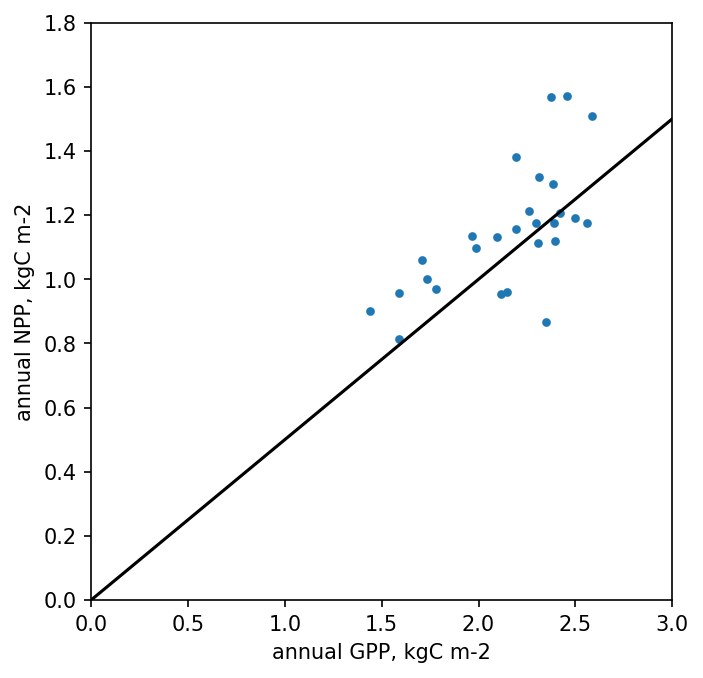

In [13]:
fig = plt.figure(figsize=(5,5), dpi=150)
plt.scatter(arr_gpp, arr_npp, s=10)
x_line = np.arange(-1.0,4.0,0.1)
y_line = np.arange(-0.5,2.0,0.05)
plt.xlabel('annual GPP, kgC m-2')
plt.ylabel('annual NPP, kgC m-2')
plt.xlim([0.0, 3.0])
plt.ylim([0.0, 1.8])
plt.plot(x_line, y_line, 'k-')

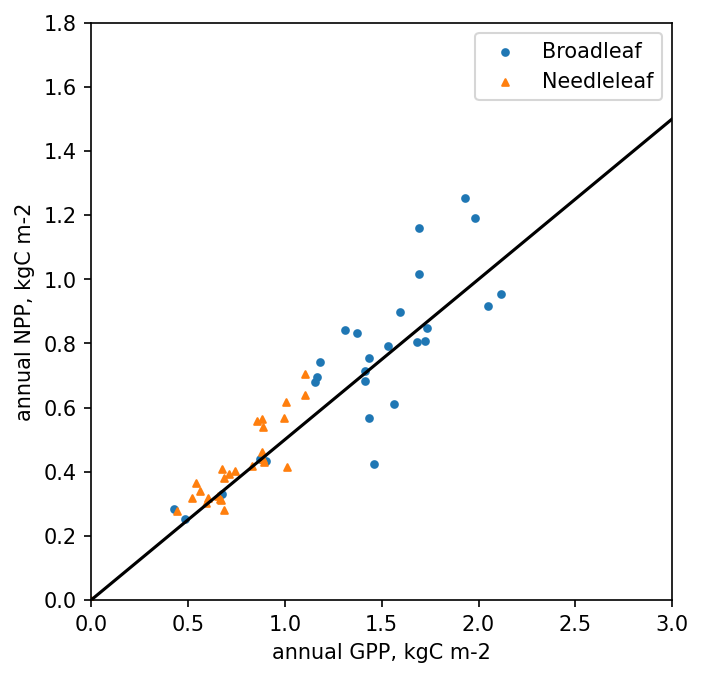

In [14]:
fig = plt.figure(figsize=(5,5), dpi=150)
plt.scatter(arr_gpp_nl, arr_npp_nl, marker = 'o', s=10)
plt.scatter(arr_gpp_bl, arr_npp_bl, marker = '^', s=10)
x_line = np.arange(-1.0,4.0,0.1)
y_line = np.arange(-0.5,2.0,0.05)
plt.xlabel('annual GPP, kgC m-2')
plt.ylabel('annual NPP, kgC m-2')
plt.xlim([0.0, 3.0])
plt.ylim([0.0, 1.8])
plt.legend(['Broadleaf', 'Needleleaf'])
plt.plot(x_line, y_line, 'k-')

#### 2) NPP to LAI

(0.0, 1.8)

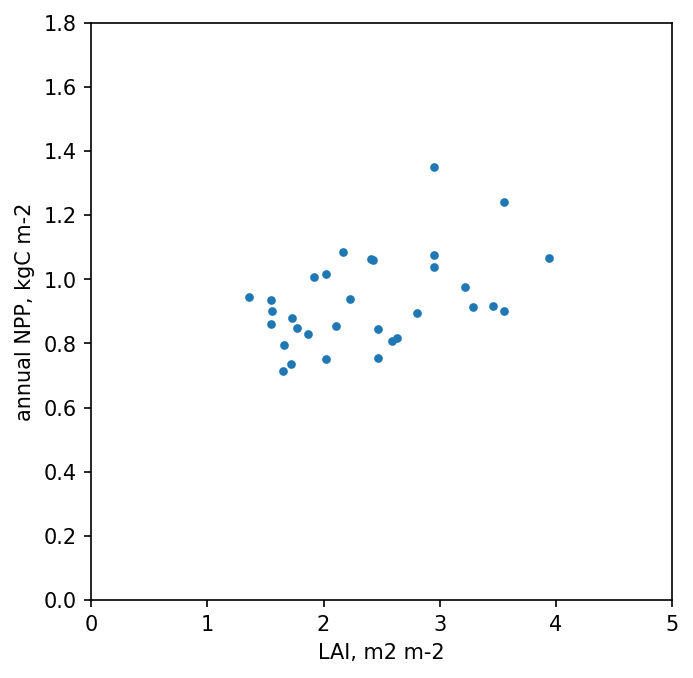

In [175]:
fig = plt.figure(figsize=(5,5), dpi=150)
plt.scatter(arr_lai, arr_npp, s=10)
x_line = np.arange(-1.0,4.0,0.1)
y_line = np.arange(-0.5,2.0,0.05)
plt.xlabel('LAI, m2 m-2')
plt.ylabel('annual NPP, kgC m-2')
plt.xlim([0.0, 5.0])
plt.ylim([0.0, 1.8])
# plt.plot(x_line, y_line, 'k-')

#### 3) LAI to leaf C

(0.0, 0.4)

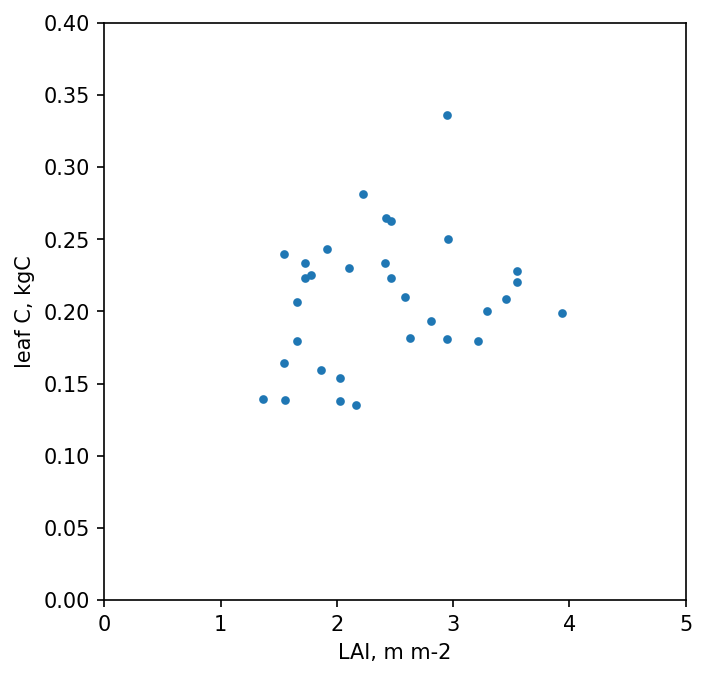

In [178]:
fig = plt.figure(figsize=(5,5), dpi=150)
plt.scatter(arr_lai, arr_leafc, s=10)
x_line = np.arange(-1.0,4.0,0.1)
y_line = np.arange(-0.5,2.0,0.05)
plt.xlabel('LAI, m m-2')
plt.ylabel('leaf C, kgC')
plt.xlim([0.0, 5.0])
plt.ylim([0.0, 0.4])
# plt.plot(x_line, y_line, 'k-')

#### 4) Root to shoot ratio

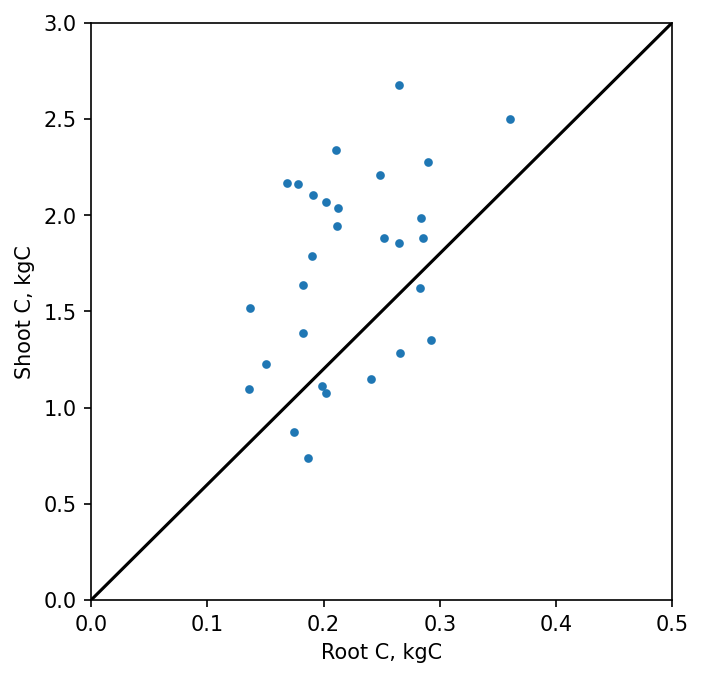

In [181]:
fig = plt.figure(figsize=(5,5), dpi=150)
plt.scatter(arr_frc, arr_leafc+arr_storec+arr_sapwoodc+arr_reprodc, s=10)
x_line = np.arange(-0.2,0.6,0.1)
y_line = np.arange(-1.2,3.0,0.6)
plt.xlabel('Root C, kgC')
plt.ylabel('Shoot C, kgC')
plt.xlim([0.0, 0.5])
plt.ylim([0.0, 3.0])
plt.plot(x_line, y_line, 'k-')

#### 5) Recruitment to mortality ratio

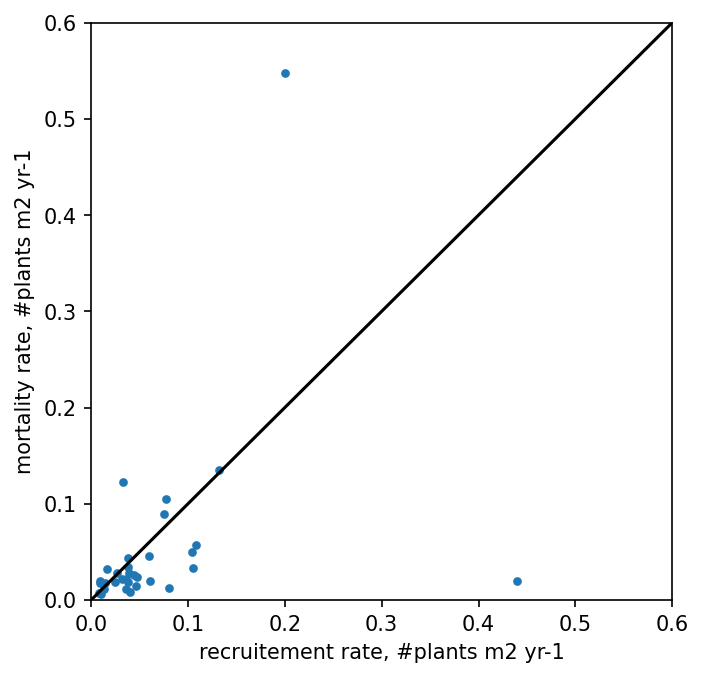

In [186]:
fig = plt.figure(figsize=(5,5), dpi=150)
plt.scatter(arr_rec, arr_mort*30, s=10)
x_line = np.arange(-1.0,5.0,0.1)
y_line = np.arange(-1.0,5.0,0.1)
plt.xlabel('recruitement rate, #plants m2 yr-1')
plt.ylabel('mortality rate, #plants m2 yr-1')
plt.xlim([0.0, 0.6])
plt.ylim([0.0, 0.6])
plt.plot(x_line, y_line, 'k-')

#### 6) size distribution against observed Peuble state statistics 

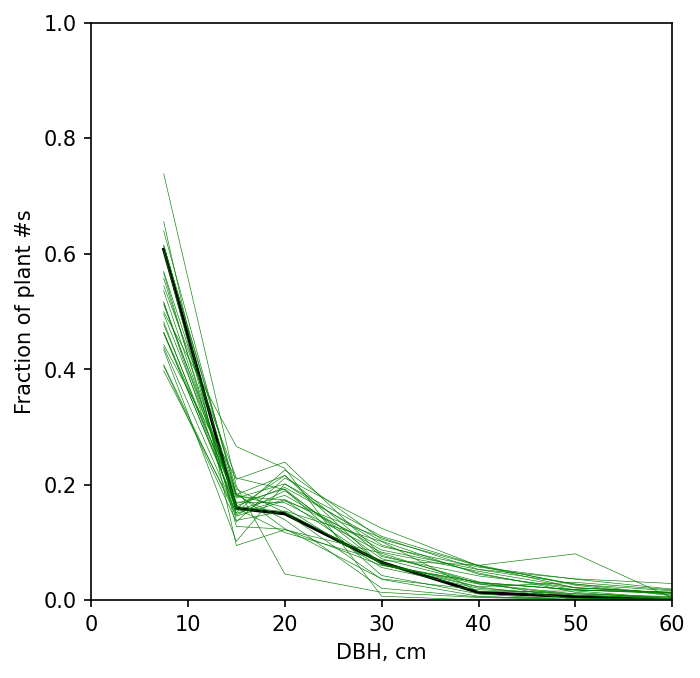

In [17]:
fig = plt.figure(figsize=(5,5), dpi=150)
lower_bin_edge_obs = np.array(oak_pine_df['lower_bin_edge'])
lower_bin_edge_ens = np.array([7.5, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200])
obs_sz_num = np.array(oak_pine_df['Oak'])
obs_sz_frac = obs_sz_num/np.sum(obs_sz_num)
plt.plot(lower_bin_edge_obs, obs_sz_frac, 'k-')
plt.xlim([0.0, 60.0])
plt.ylim([0.0, 1.0])
plt.xlabel('DBH, cm')
plt.ylabel('Fraction of plant #s')
for i in np.arange(0, len(candidates)):
    ens_sz_frac = arr_num_sz[i]/np.sum(arr_num_sz[i, 1:13])
    plt.plot(lower_bin_edge_ens[0:12], ens_sz_frac[1:13], 'g-', linewidth=0.3)
    
# Ignore plants with small DBH since observation abandoned thoes small plants


#### 7. Litter input vs. SOC

(15.0, 30.0)

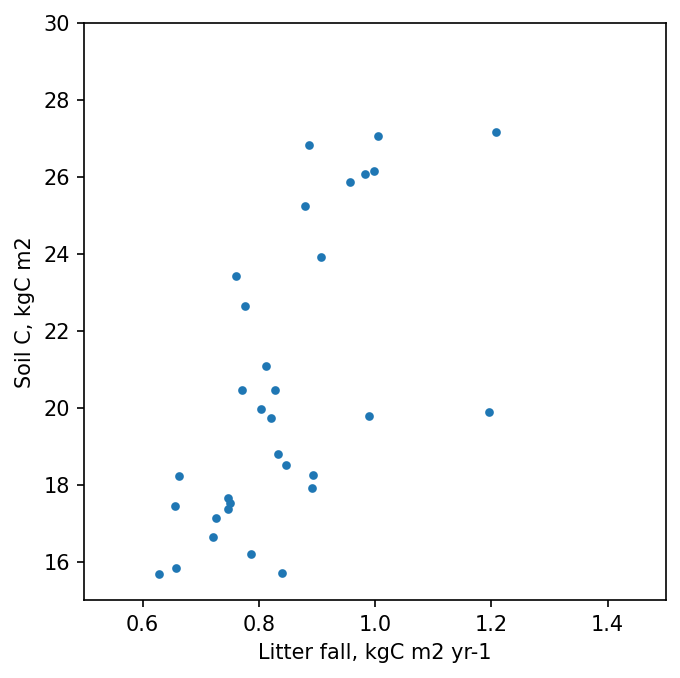

In [257]:
fig = plt.figure(figsize=(5,5), dpi=150)
plt.scatter(arr_litter*3600*24*365, arr_soilc, s=10)
# x_line = np.arange(-1.0,5.0,0.1)
# y_line = np.arange(-1.0,5.0,0.1)
plt.xlabel('Litter fall, kgC m2 yr-1')
plt.ylabel('Soil C, kgC m2')
plt.xlim([0.5, 1.5])
plt.ylim([15.0, 30.0])
# plt.plot(x_line, y_line, 'k-')

#### 8. Tree height